# Arno's Engram key layout

Engram is a key layout optimized for comfortable and efficient touch typing in English 
created by [Arno Klein](https://binarybottle.com), 
with [open source code](https://github.com/binarybottle/engram) to create other optimized key layouts.
You can install the Engram layout on [Windows, macOS, and Linux](https://keyman.com/keyboards/engram)
or [try it out online](https://keymanweb.com/#en,Keyboard_engram).

Letters are optimally arranged according to a scoring model that reflects ergonomic factors that promote reduction of lateral finger movements and increase in efficient typing of high-frequency letter pairs: 

             Y  O  U  X            W  D  C  V  Q 
             I  H  E  A            R  T  S  N  Z      
             P  K  J  G            L  B  F  M             

Punctuation marks are logically grouped together in the middle columns (accessed by the Shift and R-Alt keys) and numbers are paired with mathematical and logic symbols (accessed by the Shift Key):

          $  -  =  ~  +   <    >   /  &  %  *  ^  `
          #  1  2  3  4   5    6   7  8  9  0  |  \

             Y  O  U  X  ([{  )]}  W  D  C  V  Q 
             I  H  E  A  ,;:  .?!  R  T  S  N  Z      
             P  K  J  G  "#@  '-_  L  B  F  M             

See below for a full description and comparisons with other key layouts.

<!-- ### Default (unshifted)
![Default (unshifted) state](https://github.com/binarybottle/engram/blob/master/assets/FIXengram-base-layer.png?raw=true)
### Shift
![Shift state](https://github.com/binarybottle/engram/blob/master/assets/FIXengram-shift-layer.png?raw=true)
### R-Alt
![R-Alt state](https://github.com/binarybottle/engram/blob/master/assets/FIXengram-ralt-layer.png?raw=true)
[Keyboard images care of [Keyman Developer](https://keyman.com/developer/).] -->

(c) 2021 Arno Klein, MIT license

----------------

# Contents
1. [Why a new key layout?](#why)
2. [How does Engram compare with other key layouts?](#scores)
3. [Factors used to compute the Engram layout](#factors)
4. [Guiding criteria](#criteria)
5. [Summary of steps and results](#summary)
6. Setup:
    - [Dependencies and functions](#import)
    - [Speed matrix](#speed)
    - [Strength matrix](#strength)
    - [Flow matrix](#flow)
7. Steps:
    - [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
    - [Step 2: Arrange the most frequent letters based on comfort and bigram frequencies](#step2)
    - [Step 3: Optimize assignment of the remaining letters](#step3)
    - [Step 4: Stability tests](#step4)
    - [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)
8. [Full comparison with other common key layouts](#comparison)

## Why a new key layout? <a name="why">

**Personal history** <br>
In the future, I hope to include an engaging rationale for why I took on this challenge.
Suffice to say I love solving problems, and I have battled repetitive strain injury 
ever since I worked on an old DEC workstation at the MIT Media Lab while composing 
my thesis back in the 1990s.
I have experimented with a wide variety of human interface technologies over the years --
voice dictation, one-handed keyboard, keyless keyboard, foot mouse, and ergonomic keyboards 
like the Kinesis Advantage and Ergodox keyboards with different key switches.
While these technologies can significantly improve comfort and reduce strain, 
an optimized key layout can only help when typing on ergonomic or standard keyboards. 

I have used different key layouts (Qwerty, Dvorak, Colemak, etc.)
for communications and for writing and programming projects,
and have primarily relied on Colemak for the last 10 years. 
**I find that most to all of these key layouts:**

- Demand too much strain on tendons
    - *strenuous lateral extension of the index and little fingers*
- Ignore the ergonomics of the human hand
    - *different finger strengths*
    - *different finger lengths*
    - *natural roundedness of the hand*
    - *home row easier than upper row for shorter fingers*
    - *home row easier than lower row for longer fingers*
    - *ease of little-to-index finger rolls vs. reverse*
- Over-emphasize alternation between hands and under-emphasize same-hand, different-finger transitions
    - *same-row, adjacent finger transitions are easy and comfortable*
    - *little-to-index finger rolls are easy and comfortable*

While I used ergonomic principles outlined below and the accompanying code to help generate the Engram layout,
I also relied on massive bigram frequency data for the English language. 
if one were to follow the procedure below and use a different set of bigram frequencies for another language or text corpus,
they could create a variant of the Engram layout, say "Engram-French", better suited to the French language.
    
**Why "Engram"?** <br>
The name is a pun, referring both to "n-gram", letter permutations and their frequencies that are used to compute the Engram layout, and "engram", or memory trace, the postulated change in neural tissue to account for the persistence of memory, as a nod to my attempt to make this layout easy to remember.

## How does Engram compare with other key layouts? <a name="scores">

Despite the fact that the Engram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all text sources are listed below and available on [GitHub](https://github.com/binarybottle/text_data)). Below are tables of different prominent key layouts scored using the Engram Scoring Model (detailed below), and generated by the online [Keyboard Layout Analyzer](http://patorjk.com/keyboard-layout-analyzer/) (KLA):

> The optimal layout score is based on a weighted calculation that factors in the distance your fingers moved (33%), how often you use particular fingers (33%), and how often you switch fingers and hands while typing (34%).
 
#### Engram Scoring Model scores for existing layouts based on publicly available text data
    
| Layout | Google bigrams | Alice | Romeo | Gita | Memento | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02497 | 0.01941 | 0.02095 | 0.01935 | 0.02592 | 0.03297 | 0.02976 | 0.02789 | 0.01835 | 0.02481 | 0.04379 | 0.02735 |
| Halmak | 0.02465 | 0.01924 | 0.02078 | 0.01915 | 0.02579 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.02044 | 0.01892 | 0.02538 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| Workman | 0.02445 | 0.01906 | 0.02058 | 0.01897 | 0.02557 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.01969 | 0.01812 | 0.02445 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.02034 | 0.01881 | 0.02519 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 | 0.04216 | 0.02674 |
| Colemak | 0.02431 | 0.01881 | 0.02044 | 0.01884 | 0.02530 | 0.03229 | 0.02888 | 0.02724 | 0.01790 | 0.02418 | 0.04221 | 0.02703 |
| ASSET | 0.02371 | 0.01831 | 0.01996 | 0.01828 | 0.02484 | 0.03170 | 0.02836 | 0.02676 | 0.01743 | 0.02365 | 0.04188 | 0.02652 |
| Capewell | 0.02383 | 0.01860 | 0.02013 | 0.01858 | 0.02489 | 0.03177 | 0.02844 | 0.02670 | 0.01768 | 0.02374 | 0.04141 | 0.02620 |
| Dvorak | 0.02363 | 0.01847 | 0.02002 | 0.01834 | 0.02473 | 0.03148 | 0.02831 | 0.02640 | 0.01760 | 0.02355 | 0.04101 | 0.02596 |
| QWERTY | 0.02133 | 0.01684 | 0.01812 | 0.01669 | 0.02242 | 0.02879 | 0.02580 | 0.02404 | 0.01581 | 0.02133 | 0.03793 | 0.02401 |

#### Keyboard Layout Analyzer scores for existing layouts based on publicly available text data
    
| Layout | Alice in Wonderland | Romeo and Juliet | Bhaghavad Gita | Memento screenplay | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google website | Software |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 67.20 | 57.66 | 57.82 | 54.85 | 60.52 | 55.87 | 56.99 | 61.15 | 66.94 | 34.26 | 45.58 |
| Halmak | 66.25 | 57.02 | 57.45 | 55.03 | 60.86 | 55.53 | 57.13 | 62.32 | 67.29 | 30.41 | 47.60 |
| Norman | 62.76 | 53.21 | 53.44 | 52.33 | 57.43 | 53.24 | 53.90 | 59.97 | 62.80 | 28.29 | 46.01 |
| Workman | 64.78 | 56.67 | 56.97 | 54.29 | 59.98 | 55.81 | 56.25 | 61.34 | 65.27 | 29.28 | 47.76 | 
| QGMLWB | 65.45 | 55.67 | 55.57 | 54.07 | 60.51 | 56.05 | 56.90 | 62.23 | 66.26 | 33.05 | 45.72 | 
| Colemak Mod-DH | 65.74 | 56.05 | 57.52 | 54.91 | 60.75 | 54.94 | 57.15 | 61.29 | 67.12 | 31.85 | 48.50 | 
| Colemak | 65.83 | 56.12 | 57.63 | 54.94 | 60.67 | 54.97 | 57.04 | 61.36 | 67.14 | 31.48 | 48.65 | 
| ASSET | 64.60 | 54.63 | 56.09 | 53.84 | 58.66 | 54.72 | 55.35 | 60.81 | 64.71 | 33.05 | 47.52 | 
| Capewell | 63.40 | 55.67 | 56.56 | 53.45 | 59.27 | --- | 55.28 | 59.80 | 64.29 | 28.27 | 45.62 | 
| Dvorak | 65.86 | 58.18 | 57.29 | 55.09 | 60.93 | 55.56 | 56.59 | 62.75 | 66.64 | 28.85 | 45.55 | 
| QWERTY | 53.06 | 43.74 | 44.92 | 44.25 | 48.28 | 44.99 | 44.59 | 51.79 | 52.31 | 24.28 | 39.89 | 

---
    
| Text source | Information |
| --- | --- |
| "Alice in Wonderland" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/mN0CTbZ3) of Alice in Wonderland (Ch.1), a standard text used for comparing layouts |
| "Romeo and Juliet" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/FVBfzMB5) of [Romeo and Juliet](https://www.fulltextarchive.com/page/Romeo-and-Juliet1/) |
| "Bhaghavad Gita" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/w4xFG5HG) of [Bhaghavad Gita](https://www.gutenberg.org/files/2388/2388-h/2388-h.htm) |
| "Memento screenplay" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/WblX3l9d) of the screenplay for [Memento](https://www.dailyscript.com/scripts/memento.html) |
| "100K tweets" | 100,000 tweets from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data |
| "20K tweets" | 20,000 tweets from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) |
| "MASC tweets" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup) |
| "MASC spoken" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CvHXTg7n) of [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words) |
| "COCA blogs" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) |
| "Google website" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CtwvHjM5) of the [Google home page](https://google.com) (accessed 10/20/2020) |
| "Software" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/szdpfS3K) of the "Tower of Hanoi" (programming languages A-Z from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)) |

| Layout | Year | Website |
| --- | --- | --- |
| Engram | 2021 | https://engram.dev |
| [Halmak 2.2](https://keyboard-design.com/letterlayout.html?layout=halmak-2-2.en.ansi) | 2016 | https://github.com/MadRabbit/halmak |
| [Norman](https://keyboard-design.com/letterlayout.html?layout=norman.en.ansi) | 2013 | https://normanlayout.info/ |
| [Workman](https://keyboard-design.com/letterlayout.html?layout=workman.en.ansi) | 2010 | https://workmanlayout.org/ | 
| [QGMLWB](https://keyboard-design.com/letterlayout.html?layout=qgmlwb.en.ansi) | 2009 | http://mkweb.bcgsc.ca/carpalx/?full_optimization | 
| [Colemak Mod-DH](https://keyboard-design.com/letterlayout.html?layout=colemak-mod-DH-full.en.ansi) | 2017 | https://colemakmods.github.io/mod-dh/ | 
| [Colemak](https://keyboard-design.com/letterlayout.html?layout=colemak.en.ansi) | 2006 | https://colemak.com/ | 
| [ASSET](https://keyboard-design.com/letterlayout.html?layout=asset.en.ansi) | 2006 | http://millikeys.sourceforge.net/asset/ | 
| [Capewell-Dvorak](https://keyboard-design.com/letterlayout.html?layout=capewell.en.ansi) | 2004 | http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm |
| [Dvorak](https://keyboard-design.com/letterlayout.html?layout=dvorak.en.ansi) | 1936 | https://en.wikipedia.org/wiki/Dvorak_keyboard_layout | 
| [QWERTY](https://keyboard-design.com/letterlayout.html?layout=qwerty.en.ansi) | 1873 | https://en.wikipedia.org/wiki/QWERTY |

## Factors used to compute the Engram layout <a name="factors">
  - **N-gram letter frequencies** <br>
    
    [Peter Norvig's analysis](http://www.norvig.com/mayzner.html) of data from Google's book scanning project
  - **Flow factors** (transitions between ordered key pairs) <br>
    These factors are influenced by Dvorak's 11 criteria (1936).
  - **Finger strengths** (peak keyboard reaction forces) <br>
      "Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work", BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664.
  - **Speed** (unordered interkey stroke times) <br>
      "Estimation of digraph costs for keyboard layout optimization", A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
      _NOTE: Speed data were only used for exploration of early key layouts._

## Guiding criteria   <a name="criteria">

1.  Assign 24 letters to columns of keys that don't require lateral finger movement.
2.  Assign common punctuation to keys in the middle columns of the keyboard.
3.  Assign easier-to-remember characters to the shift-number keys.
4.  Group letters for common command shortcuts close together.
5.  Arrange letters so that more frequent bigrams are faster and easier to type.
6.  Balance finger loads according to their relative strength.
7.  Promote alternating between hands over uncomfortable transitions with the same hand.
8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
9.  Avoid stretching shorter fingers up and longer fingers down.
10. Avoid using the same finger.
11. Avoid the upper and lower rows.
12. Avoid skipping over the home row.

## Summary of steps and results  <a name="summary">

### Step 1: Define the shape of the key layout to minimize lateral finger movements

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, Z and Q, to the two hardest-to-reach keys lying outside the 24-key columns in the upper right:

        Left:            Right:
     1  2  3  4       13 14 15 16  Q/Z
     5  6  7  8       17 18 19 20  Z/Q
     9 10 11 12       21 22 23 24

### Step 2: Arrange the most frequent letters based on comfort and bigram frequencies

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in stages, based on ergonomic principles.
    
In prior experiments using the methods below, all vowels consistently automatically clustered together. Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters Z and Q there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

#### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, C, **U**, M, F, P, G, W, **Y**, B, V, K, X, J, Q, Z

We will assign the four most frequent vowels (E,A,O,I) to the most comfortable keys in the home and upper rows (keys 5-8 and 2-3) of one side, with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). The letter U may also take the less comfortable key 4. We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: TH, not HT) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to two comfortable and efficient layouts:
    
         -  O  U  -
         I  -  E  A    

         -  -  U  - 
         I  O  E  A      
   
#### Consonants

Next, to populate the home row on the other side of the keyboard, we examine all possible sequences of four letters from the eight most frequent consonants (T,N,S,R,H,L,D,C), covering half the alphabet, where each letter has at least 100 billion (at least 3% of) instances in Peter Norvig's analysis:

E, **T**, A, O, I, **N, S, R, H, L, D, C**, U, M, F, P, G, W, Y, B, V, K, X, J, Q, Z

These eight consonants are included among the highest frequency bigrams, listed below in bold, with more than 10 billion instances:

**TH, ND, ST, NT, CH, NS, CT, TR, RS, NC**, (RT), SH, LD, RD, LS, DS, LT, (TL), RL, HR, NL, (SL)
    
To maximize the number of bigrams we can comfortably type, we select 4-consonant sequences that consist of three consecutive highest frequency (>10 billion instances) bigrams, such as NSTR = NS + ST + TR. We also restrict T to the strongest (middle or index) fingers, because T is the most frequent consonant. Below are the resulting 4 consonant sequences:

         N  S  T  H
         N  S  T  R
         N  C  T  H
         N  C  T  R
    
The resulting 2 arrangements of five vowels on the left and 4 arrangements of four consonants on the right gives us 8 layouts, each with 15 unassigned keys (letters on the right side are reversed, in case Hand 2 is assigned to the right hand):

        Hand 1            Hand 2
    -OU- I-EA ----    ---- HTSN ----
    -OU- I-EA ----    ---- RTSN ----
    -OU- I-EA ----    ---- HTCN ----
    -OU- I-EA ----    ---- RTCN ----
    --U- IOEA ----    ---- HTSN ----
    --U- IOEA ----    ---- RTSN ----
    --U- IOEA ----    ---- HTCN ----
    --U- IOEA ----    ---- RTCN ----    

### Step 3: Optimize assignment of the remaining letters
    
We want to assign the 15 missing letters to the unassigned keys in each of the above 8 layouts based on our scoring model. That would mean scoring all possible arrangements for each layout and choosing the arrangement with the highest score, but since there are over 1.3 trillion possible ways of arranging 15 letters (15! = 1,307,674,368,000), we will need to break up the assignment into two stages: first for the most frequent remaining letters, and second for the least frequent remaining letters. 
    
#### Most frequent letters
First we will compute scores for every possible arrangement of the 9 most frequent remaining letters among those in bold below for the most comfortable of the remaining positions (4,9,12,13,14,15,21,24, and either 2 or 6):

E, T, A, O, I, N, **S, R, H, L, D, C**, U, **M, F, P, G, W**, Y, B, V, K, X, J, Q, Z

       Hand 1:          Hand 2:
     -  2  -  4       13 14 15  -
     -  6  -  -        -  -  -  -
     9  -  - 12       21  -  - 24
    
Since there are 9! = 362,880 possible combinations, and we have 8 layouts, we need to score and evaluate 2,903,040 combinations.  
    
To score each arrangement of letters, we construct a frequency matrix of each ordered pair of letters (bigram), and multiply this frequency matrix by our speed-strength-flow matrix to compute a score. 
    
#### Least frequent letters
Second, we will compute scores for every possible arrangement of the 8 least frequent letters (aside from Z and Q) in bold below for the least comfortable remaining positions (1,10,11,16,22,23, and again: 4,13):

E, T, A, O, I, N, S, R, H, L, D, C, U, M, F, P, **G, W, Y, B, V, K, X, J**, Q, Z

       Hand 1:          Hand 2:
     1  -  -  4       13  -  - 16
     -  -  -  -       -   -  -  -
     - 10 11  -       -  22 23  -   

Since there are 8! = 40,320 possible combinations, and we have 8 layouts, we need to score and evaluate 322,560 more combinations.    
    
    
#### **Engram Scoring Model**
    
The optimization algorithm finds every permutation of a given set of letters, maps these letter permutations to a set of keys, and ranks these letter-key mappings according to a score reflecting ease of typing key pairs and frequency of letter pairs (bigrams). The score is the average of the scores for all possible bigrams in this arrangement. The score for each bigram is a product of the frequency of occurrence of that bigram and the factors Flow, Strength, and Speed: 

**Flow**: measure of ease of a finger transition from the first in a pair of letters to the second

Flow factors to _penalize_ difficult key transitions include:
    
- roll out from index to little finger
- index or little finger on top row
- middle or ring finger on bottom row
- index above middle, or little above ring 
- index above ring, or little above middle
- ring above middle
- use same finger twice for a non-repeating letter
- at least one key not on home row
- one key on top row, the other on bottom row

**Strength**: measure of the average strength of the finger(s) used to type the two letters

Finger strengths are based on peak keyboard reaction forces (in newtons) from "Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work", BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996, 38(4), 654-664.

**Speed**: normalized interkey stroke times

These are left-right averaged versions derived from the study data below, to compensate for right-handedness of participants in the study (we used this data for early experimentation and validation):

"Estimation of digraph costs for keyboard layout optimization", 
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. 

    
### Step 4: Stability Tests
    
We will run three types of stability tests on the 8 winning layouts:
    1. Exchange letters in rows
    2. Compare effects of Flow, Strength, and/or Speed matrices
    3. Reset parameters

It is clear from the results of all of the tests above that one layout consistently scores at the top, and we will accept this as the winning layout. Since the middle row spells "I HEARTS N" we'll put Z to the right for "I HEARTS NZ" (for New Zealand) so that it is easy to remember, and place the Q above:

             Y  O  U  X     W  D  C  V  Q 
             I  H  E  A     R  T  S  N  Z      
             P  K  J  G     L  B  F  M             
    
Our arrangement of letters is complete!
    
### Step 5. Arrange non-letter characters in easy-to-remember places

Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.
    
#### Frequency of punctuation 

These sources helped guide our arrangement:
    
  - "Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
    S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
    https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
    http://www.viviancook.uk/Punctuation/PunctFigs.htm

  - "Computer Languages Character Frequency" <br>
    Xah Lee. Date: 2013-05-23. Last updated: 2020-06-29. <br>
    http://xahlee.info/comp/computer_language_char_distribution.html

#### Add punctuation keys and number keys

We will place the most common punctuation marks in the middle columns: 
**( ,  .  '  "  ;  :  -  _ )** 

             Y  O  U  X  (    )    W  D  C  V  Q 
             I  H  E  A  ,    .    R  T  S  N  Z      
             P  K  J  G  '    "    L  B  F  M             

We will use the Shift and R-Alt keys to group similar punctuation marks:

             Y  O  U  X  ([{  )]}  W  D  C  V  Q 
             I  H  E  A  ,;:  .?!  R  T  S  N  Z      
             P  K  J  G  "#@  '-_  L  B  F  M             
    
([{ )]} 
&nbsp;&nbsp;&nbsp;&nbsp;
Brackets: parentheses, square brackets, curly brackets (angle brackets are placed in the two number keys directly above).  

, ; : 
&nbsp;&nbsp;&nbsp;&nbsp;
Separating marks: the comma separates text, for example in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); the colon ends one statement but precedes the following: an explanation, quotation, list, etc. 

. ? ! 
&nbsp;&nbsp;&nbsp;&nbsp;
Ending marks: the period, question mark, and exclamation mark end a sentence.

" # @ 
&nbsp;&nbsp;&nbsp;&nbsp;
Identifying characters: double quotation marks are for direct quotations from an identified source; the hashtag is a popular modern use of the pound/hash sign to identify digital content on a specific topic; the "at sign" identifies a location or affiliation (such as in email addresses), and acts as a "handle" to identify users in popular social media platforms and online forums.   

' - _ 
&nbsp;&nbsp;&nbsp;&nbsp;
Joining characters: the apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

For the number keys, we will have the Shift key access mathematical and logic symbols:
    
          $  -  =  ~  +   <    >   /  &  %  *  ^
          #  1  2  3  4   5    6   7  8  9  0  |

\# $ 
&nbsp;&nbsp;&nbsp;&nbsp;
The pound/hash (duplicate) represents numbers and is set next to the number keys; the dollar sign signifies additional symbols ("S").

\-  =  ~  +   <    >   \/  &  %  * &nbsp;&nbsp;&nbsp;&nbsp; 

    1: - (minus/hyphen: 1 stroke, like the Chinese character for "1")
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: / (forward slash: for division; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0")

| ^
&nbsp;&nbsp;&nbsp;&nbsp;
The vertical bar or "pipe" represents the logical OR operator; the caret represents the logical XOR operator, as well as exponentiation.

Use of the Shift and R-Alt keys enables easy access to the most common punctuation marks in the middle columns, and it also frees up the three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key). These three keys excessively stretch the right little finger, and are displaced in special ergonomic keyboards, such as the Kinesis Advantage and Ergodox. So for two of these keys, we will simply repeat the use of four of punctuation marks that are accessed in the middle columns by the R-Alt key (: ! and @ _). For the final (top rightmost) key, we will assign to it the two remaining symbols, used primarily by computer programmers:

\\ \` 
&nbsp;&nbsp;&nbsp;&nbsp;
The backslash is often used as an escape character or to enclose regular expressions to process text; the backtick processes an enclosed string as part of a computer command (command substitution) or indicates code in comments.

The resulting Engram layout:

          $  -  =  ~  +   <    >   /  &  %  *  ^  `
          #  1  2  3  4   5    6   7  8  9  0  |  \

             Y  O  U  X  ([{  )]}  W  D  C  V  Q 
             I  H  E  A  ,;:  .?!  R  T  S  N  Z      
             P  K  J  G  "#@  '-_  L  B  F  M             


### Import dependencies and functions  <a name="import">

In [41]:
# Import dependencies
import xlrd
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib
import matplotlib.pyplot as plt    
import seaborn as sns

# Influence of strength data
strength_factor = 0.01  # Published finger strength data is given very low weight, and is used primarily for ordering initial sequence of letters in Step 1.

# Influence of speed data
apply_speed = False
speed_factor = 0.01  # Published speed data was only used for early experimentation.


# Find all permutations of letters, optimize layout, and generate output:
def permute_optimize(letters, all_letters, all_keys, data_matrix, bigrams, bigram_frequencies, verbose=False, ntop=0):
    matrix_selected = select_keys(data_matrix, all_keys, verbose=False)
    move_positions = []
    fixed_positions = [] 
    move_letters = []
    fixed_letters = []
    assigned_letters = []
    for iletter, letter in enumerate(letters):
        if letter.strip() == "":
            move_positions.append(iletter)
            for all_letter in all_letters:
                if all_letter not in letters and all_letter not in assigned_letters:
                    move_letters.append(all_letter)
                    assigned_letters.append(all_letter)
                    break
        else:
            fixed_positions.append(iletter)
            fixed_letters.append(letter)
    #print(move_positions, fixed_positions, move_letters, fixed_letters)
    letter_permutations = permute_letters(move_letters, verbose)
    top_permutation, scores = optimize_layout(matrix_selected, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions, verbose)
    if ntop > 0:
        print_top_scores(letter_permutations, scores, ntop)
    
    return top_permutation, letter_permutations, scores


# Select keys to quantify pairwise relationships:
def select_keys(data_matrix, keys, verbose=False):

    # Extract pairwise entries for the keys:
    nkeys = len(keys)
    Select = np.zeros((nkeys, nkeys))
    u = 0
    for i in keys:
        u += 1
        v = 0
        for j in keys:
            v += 1
            Select[u-1,v-1] = data_matrix[i-1,j-1]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMin = np.min(Select) / np.max(Select)
    newMax = 1.0
    Select = newMin + (Select - np.min(Select)) * (newMax - newMin) / (np.max(Select) - np.min(Select))
    
    if verbose:
        #print("Matrix:")
        #np.set_printoptions(precision=2); print(Select)

        # Heatmap of array
        heatmap(data=Select, title="Matrix heatmap", xlabel="Key 1", ylabel="Key 2"); plt.show()
    
    return Select


# Find all permutations of a given set of letters (max: 8-10 letters)
def permute_letters(letters, verbose=False):
    letter_permutations = []
    for p in multiset_permutations(letters):
        letter_permutations.append(p)
    letter_permutations = np.array(letter_permutations)
    #if verbose:
    #    print("First permutation: {0}".format(letter_permutations[0])) 
    
    return letter_permutations


# Compute the score for a given letter-key layout (NOTE normalization step):
def score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False):

    # Create a matrix of bigram frequencies:
    nletters = len(letters)
    F = np.zeros((nletters, nletters))

    # Find the bigram frequency for each ordered pair of letters in the permutation:
    for i1 in range(nletters):
        for i2 in range(nletters):
            bigram = letters[i1] + letters[i2]
            i2gram = np.where(bigrams == bigram)
            if np.size(i2gram) > 0:
                F[i1, i2] = bigram_frequencies[i2gram][0]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMax = 1
    newMin = np.min(F) / np.max(F)
    F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    # Compute the score for this permutation:
    score = np.average(data_matrix * F) 

    if verbose:
        print("Score for letter permutation {0}: {1}".format(letters, score))

    return score


# Compute the score for a given letter-key layout (NOTE normalization step):
def tally_bigrams(input_text, bigrams, normalize=True, verbose=False):
   
    # Find the bigram frequency for each ordered pair of letters in the input text
    #input_text = [str.upper(str(x)) for x in input_text]
    input_text = [str.upper(x) for x in input_text]
    nchars = len(input_text)
    F = np.zeros(len(bigrams))

    for ichar in range(0, nchars-1):
        bigram = input_text[ichar] + input_text[ichar + 1]
        i2gram = np.where(bigrams == bigram)
        if np.size(i2gram) > 0:
            F[i2gram] += 1

    # Normalize matrix with min-max scaling to a range with max 1:
    if normalize:
        newMax = 1
        newMin = np.min(F) / np.max(F)
        F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    bigram_frequencies_for_input = F

    if verbose:
        print("Bigram frequencies for input: {0}".format(bigram_frequencies_for_input))

    return bigram_frequencies_for_input


# Compute scores for all letter-key layouts:
def optimize_layout(data_matrix, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions=[], verbose=False):
    iter = 0
    top_score = 0
    scores = []
    use_score_function = False

    nletters = len(move_positions) + len(fixed_positions)
    top_permutation = np.array(['E' for x in range(nletters)])
    F = np.zeros((nletters, nletters))

    # Loop through the permutations of the selected letters:
    for p in letter_permutations:
        letters = np.array(['E' for x in range(nletters)])  # KEEP to initialize!
        for imove, move_position in enumerate(move_positions):
            letters[move_position] = p[imove]
        for ifixed, fixed_position in enumerate(fixed_positions):
            letters[fixed_position] = fixed_letters[ifixed]

        # Compute the score for this permutation:
        if use_score_function:
            score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
        else:
            # Find the bigram frequency for each ordered pair of letters in the permutation:
            for i1 in range(nletters):
                for i2 in range(nletters):
                    bigram = letters[i1] + letters[i2]
                    i2gram = np.where(bigrams == bigram)
                    # Put bigram frequency in matrix of bigram frequencies:
                    if np.size(i2gram) > 0:
                        F[i1, i2] = bigram_frequencies[i2gram][0]
                    else:
                        F[i1, i2] = 0
                        
            # Normalize matrix with min-max scaling to a range with max 1:
            minF = np.min(F)
            maxF = np.max(F)
            newMin = minF / maxF
            F = newMin + (F - minF) * (1 - newMin) / (maxF - minF)

            # Compute the score for this permutation:
            score = np.average(data_matrix * F) 

        # Store all scores and the top score and permutation:
        scores.append(score)
        if score > top_score:
            top_score = score
            top_permutation = letters
            
        if verbose:
            iter += 1
            if iter % len(letter_permutations)/10 == 0:
                print("{0}: {1} {2:0.5f}".format(iter, top_permutation, top_score))
                #imax = np.argmax(scores)
                #print(scores[imax], letter_permutations[imax])
        
    print("Topmost of {0} permutations: {1}".format(len(letter_permutations), top_score))
    print("{0}".format(top_permutation))
        
    return top_permutation, scores


# Print top-scored letter permutations:
def print_top_scores(letter_permutations, scores, ntop):
    scores_negative = -np.array(scores)
    isort = np.argsort(scores_negative)[:ntop]
    sorted_scores = [scores[isort[x]] for x in range(len(isort))]
    sorted_letter_permutations = [letter_permutations[isort[x]].tolist() for x in range(len(isort))]
    for ix, x in enumerate(sorted_letter_permutations):
        print(x, sorted_scores[ix])
        
    
# Print matrix output:
def print_matrix_info(matrix_data, matrix_label, nkeys, nlines=10):
    print("{0} min = {1}, max = {2}".format(matrix_label, np.min(matrix_data), np.max(matrix_data)))
    matrix_flat = matrix_data.flatten()
    argsort = np.argsort(matrix_flat)
    print("{0} key number pairs with minimum values:".format(matrix_label))
    for x in argsort[0:nlines]:
        if x % nkeys == 0:
            min_row = np.int(np.ceil(x / nkeys)) + 1
            min_col = 1
        else:
            min_row = np.int(np.ceil(x / nkeys))
            min_col = x - nkeys * (min_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(min_row, min_col, matrix_flat[x]))
    print("{0} key number pairs with maximum values:".format(matrix_label))
    max_sort = argsort[-nlines::]
    for x in max_sort[::-1]:
        if x % nkeys == 0:
            max_row = np.int(np.ceil(x / nkeys)) + 1
            max_col = 1
        else:
            max_row = np.int(np.ceil(x / nkeys))
            max_col = x - nkeys * (max_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(max_row, max_col, matrix_flat[x]))


# Plot heatmap of matrix:
def heatmap(data, title="", xlabel="", ylabel=""):
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    sns_plot = sns.heatmap(data, linewidths=1, cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns_plot.figure.savefig("{0}_heatmap.png".format(title))
    
    
# Plot histogram:
def histmap(data, title=""):
    sns.distplot(data)
    plt.title(title)
    sns_plot.figure.savefig("{0}_histogram.png".format(title))

### Bigram frequencies <a name="ngrams">

[Peter Norvig's ngrams table](http://www.norvig.com/mayzner.html](http://www.norvig.com/mayzner.html)
    
[NOTE: If you want to compute an optimized layout for another language, or based on another corpus, you can run the tally_bigrams() function above and replace bigram_frequencies below before running the rest of the code.]

In [42]:
load_original_ngram_files = False
if load_original_ngram_files:
    ngrams_table = "data/bigrams-trigrams-frequencies.xlsx"
    wb = xlrd.open_workbook(ngrams_table) 
    ngrams_sheet = wb.sheet_by_index(0)
    # 1-grams and frequencies
    onegrams = np.array(())
    onegram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "2-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "1-gram":
            start1 = 1
        elif start1 == 1:
            onegrams = np.append(onegrams, ngrams_sheet.cell_value(i, 0))
            onegram_frequencies = np.append(onegram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    onegram_frequencies = onegram_frequencies / np.sum(onegram_frequencies)

    # 2-grams and frequencies
    bigrams = np.array(())
    bigram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "3-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "2-gram":
            start1 = 1
        elif start1 == 1:
            bigrams = np.append(bigrams, ngrams_sheet.cell_value(i, 0))
            bigram_frequencies = np.append(bigram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    bigram_frequencies = bigram_frequencies / np.sum(bigram_frequencies)

    # Save:
    file = open("onegrams.txt", "w+")
    file.write(str(onegrams))
    file.close()
    file = open("onegram_frequencies.txt", "w+")
    file.write(str(onegram_frequencies))
    file.close()
    file = open("bigrams.txt", "w+")
    file.write(str(bigrams))
    file.close()
    file = open("bigram_frequencies.txt", "w+")
    file.write(str(bigram_frequencies))
    file.close()

    # Print:
    print(repr(onegrams))
    print(repr(onegram_frequencies))
    print(repr(bigrams))
    print(repr(bigram_frequencies))

else:
    onegrams = np.array(['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U',
       'M', 'F', 'P', 'G', 'W', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z'],
      dtype='<U32')
    onegram_frequencies = np.array([0.12492063, 0.09275565, 0.08040605, 0.07640693, 0.07569278,
       0.07233629, 0.06512767, 0.06279421, 0.05053301, 0.04068986,
       0.03816958, 0.03343774, 0.02729702, 0.02511761, 0.02403123,
       0.02135891, 0.01869376, 0.01675664, 0.0166498 , 0.01484649,
       0.01053252, 0.00540513, 0.00234857, 0.00158774, 0.00120469,
       0.00089951])
    bigrams = np.array(['TH', 'HE', 'IN', 'ER', 'AN', 'RE', 'ON', 'AT', 'EN', 'ND', 'TI',
       'ES', 'OR', 'TE', 'OF', 'ED', 'IS', 'IT', 'AL', 'AR', 'ST', 'TO',
       'NT', 'NG', 'SE', 'HA', 'AS', 'OU', 'IO', 'LE', 'VE', 'CO', 'ME',
       'DE', 'HI', 'RI', 'RO', 'IC', 'NE', 'EA', 'RA', 'CE', 'LI', 'CH',
       'LL', 'BE', 'MA', 'SI', 'OM', 'UR', 'CA', 'EL', 'TA', 'LA', 'NS',
       'DI', 'FO', 'HO', 'PE', 'EC', 'PR', 'NO', 'CT', 'US', 'AC', 'OT',
       'IL', 'TR', 'LY', 'NC', 'ET', 'UT', 'SS', 'SO', 'RS', 'UN', 'LO',
       'WA', 'GE', 'IE', 'WH', 'EE', 'WI', 'EM', 'AD', 'OL', 'RT', 'PO',
       'WE', 'NA', 'UL', 'NI', 'TS', 'MO', 'OW', 'PA', 'IM', 'MI', 'AI',
       'SH', 'IR', 'SU', 'ID', 'OS', 'IV', 'IA', 'AM', 'FI', 'CI', 'VI',
       'PL', 'IG', 'TU', 'EV', 'LD', 'RY', 'MP', 'FE', 'BL', 'AB', 'GH',
       'TY', 'OP', 'WO', 'SA', 'AY', 'EX', 'KE', 'FR', 'OO', 'AV', 'AG',
       'IF', 'AP', 'GR', 'OD', 'BO', 'SP', 'RD', 'DO', 'UC', 'BU', 'EI',
       'OV', 'BY', 'RM', 'EP', 'TT', 'OC', 'FA', 'EF', 'CU', 'RN', 'SC',
       'GI', 'DA', 'YO', 'CR', 'CL', 'DU', 'GA', 'QU', 'UE', 'FF', 'BA',
       'EY', 'LS', 'VA', 'UM', 'PP', 'UA', 'UP', 'LU', 'GO', 'HT', 'RU',
       'UG', 'DS', 'LT', 'PI', 'RC', 'RR', 'EG', 'AU', 'CK', 'EW', 'MU',
       'BR', 'BI', 'PT', 'AK', 'PU', 'UI', 'RG', 'IB', 'TL', 'NY', 'KI',
       'RK', 'YS', 'OB', 'MM', 'FU', 'PH', 'OG', 'MS', 'YE', 'UD', 'MB',
       'IP', 'UB', 'OI', 'RL', 'GU', 'DR', 'HR', 'CC', 'TW', 'FT', 'WN',
       'NU', 'AF', 'HU', 'NN', 'EO', 'VO', 'RV', 'NF', 'XP', 'GN', 'SM',
       'FL', 'IZ', 'OK', 'NL', 'MY', 'GL', 'AW', 'JU', 'OA', 'EQ', 'SY',
       'SL', 'PS', 'JO', 'LF', 'NV', 'JE', 'NK', 'KN', 'GS', 'DY', 'HY',
       'ZE', 'KS', 'XT', 'BS', 'IK', 'DD', 'CY', 'RP', 'SK', 'XI', 'OE',
       'OY', 'WS', 'LV', 'DL', 'RF', 'EU', 'DG', 'WR', 'XA', 'YI', 'NM',
       'EB', 'RB', 'TM', 'XC', 'EH', 'TC', 'GY', 'JA', 'HN', 'YP', 'ZA',
       'GG', 'YM', 'SW', 'BJ', 'LM', 'CS', 'II', 'IX', 'XE', 'OH', 'LK',
       'DV', 'LP', 'AX', 'OX', 'UF', 'DM', 'IU', 'SF', 'BT', 'KA', 'YT',
       'EK', 'PM', 'YA', 'GT', 'WL', 'RH', 'YL', 'HS', 'AH', 'YC', 'YN',
       'RW', 'HM', 'LW', 'HL', 'AE', 'ZI', 'AZ', 'LC', 'PY', 'AJ', 'IQ',
       'NJ', 'BB', 'NH', 'UO', 'KL', 'LR', 'TN', 'GM', 'SN', 'NR', 'FY',
       'MN', 'DW', 'SB', 'YR', 'DN', 'SQ', 'ZO', 'OJ', 'YD', 'LB', 'WT',
       'LG', 'KO', 'NP', 'SR', 'NQ', 'KY', 'LN', 'NW', 'TF', 'FS', 'CQ',
       'DH', 'SD', 'VY', 'DJ', 'HW', 'XU', 'AO', 'ML', 'UK', 'UY', 'EJ',
       'EZ', 'HB', 'NZ', 'NB', 'MC', 'YB', 'TP', 'XH', 'UX', 'TZ', 'BV',
       'MF', 'WD', 'OZ', 'YW', 'KH', 'GD', 'BM', 'MR', 'KU', 'UV', 'DT',
       'HD', 'AA', 'XX', 'DF', 'DB', 'JI', 'KR', 'XO', 'CM', 'ZZ', 'NX',
       'YG', 'XY', 'KG', 'TB', 'DC', 'BD', 'SG', 'WY', 'ZY', 'AQ', 'HF',
       'CD', 'VU', 'KW', 'ZU', 'BN', 'IH', 'TG', 'XV', 'UZ', 'BC', 'XF',
       'YZ', 'KM', 'DP', 'LH', 'WF', 'KF', 'PF', 'CF', 'MT', 'YU', 'CP',
       'PB', 'TD', 'ZL', 'SV', 'HC', 'MG', 'PW', 'GF', 'PD', 'PN', 'PC',
       'RX', 'TV', 'IJ', 'WM', 'UH', 'WK', 'WB', 'BH', 'OQ', 'KT', 'RQ',
       'KB', 'CG', 'VR', 'CN', 'PK', 'UU', 'YF', 'WP', 'CZ', 'KP', 'DQ',
       'WU', 'FM', 'WC', 'MD', 'KD', 'ZH', 'GW', 'RZ', 'CB', 'IW', 'XL',
       'HP', 'MW', 'VS', 'FC', 'RJ', 'BP', 'MH', 'HH', 'YH', 'UJ', 'FG',
       'FD', 'GB', 'PG', 'TK', 'KK', 'HQ', 'FN', 'LZ', 'VL', 'GP', 'HZ',
       'DK', 'YK', 'QI', 'LX', 'VD', 'ZS', 'BW', 'XQ', 'MV', 'UW', 'HG',
       'FB', 'SJ', 'WW', 'GK', 'UQ', 'BG', 'SZ', 'JR', 'QL', 'ZT', 'HK',
       'VC', 'XM', 'GC', 'FW', 'PZ', 'KC', 'HV', 'XW', 'ZW', 'FP', 'IY',
       'PV', 'VT', 'JP', 'CV', 'ZB', 'VP', 'ZR', 'FH', 'YV', 'ZG', 'ZM',
       'ZV', 'QS', 'KV', 'VN', 'ZN', 'QA', 'YX', 'JN', 'BF', 'MK', 'CW',
       'JM', 'LQ', 'JH', 'KJ', 'JC', 'GZ', 'JS', 'TX', 'FK', 'JL', 'VM',
       'LJ', 'TJ', 'JJ', 'CJ', 'VG', 'MJ', 'JT', 'PJ', 'WG', 'VH', 'BK',
       'VV', 'JD', 'TQ', 'VB', 'JF', 'DZ', 'XB', 'JB', 'ZC', 'FJ', 'YY',
       'QN', 'XS', 'QR', 'JK', 'JV', 'QQ', 'XN', 'VF', 'PX', 'ZD', 'QT',
       'ZP', 'QO', 'DX', 'HJ', 'GV', 'JW', 'QC', 'JY', 'GJ', 'QB', 'PQ',
       'JG', 'BZ', 'MX', 'QM', 'MZ', 'QF', 'WJ', 'ZQ', 'XR', 'ZK', 'CX',
       'FX', 'FV', 'BX', 'VW', 'VJ', 'MQ', 'QV', 'ZF', 'QE', 'YJ', 'GX',
       'KX', 'XG', 'QD', 'XJ', 'SX', 'VZ', 'VX', 'WV', 'YQ', 'BQ', 'GQ',
       'VK', 'ZJ', 'XK', 'QP', 'HX', 'FZ', 'QH', 'QJ', 'JZ', 'VQ', 'KQ',
       'XD', 'QW', 'JX', 'QX', 'KZ', 'WX', 'FQ', 'XZ', 'ZX'], dtype='<U32')
    bigram_frequencies = np.array([3.55620339e-02, 3.07474124e-02, 2.43274529e-02, 2.04826481e-02,
       1.98515108e-02, 1.85432319e-02, 1.75804642e-02, 1.48673230e-02,
       1.45424846e-02, 1.35228145e-02, 1.34257882e-02, 1.33939375e-02,
       1.27653906e-02, 1.20486963e-02, 1.17497528e-02, 1.16812337e-02,
       1.12842988e-02, 1.12327374e-02, 1.08744953e-02, 1.07489847e-02,
       1.05347566e-02, 1.04126653e-02, 1.04125115e-02, 9.53014842e-03,
       9.32114579e-03, 9.25763559e-03, 8.71095073e-03, 8.70002319e-03,
       8.34931851e-03, 8.29254235e-03, 8.25280566e-03, 7.93859725e-03,
       7.93006486e-03, 7.64818391e-03, 7.63241814e-03, 7.27618866e-03,
       7.26724441e-03, 6.98707488e-03, 6.91722265e-03, 6.88165290e-03,
       6.85633031e-03, 6.51417363e-03, 6.24352184e-03, 5.97765978e-03,
       5.76571076e-03, 5.76283716e-03, 5.65269345e-03, 5.50057242e-03,
       5.46256885e-03, 5.42747781e-03, 5.38164098e-03, 5.30301559e-03,
       5.29886071e-03, 5.27529444e-03, 5.08937452e-03, 4.92966405e-03,
       4.87753568e-03, 4.84902069e-03, 4.77989185e-03, 4.77282719e-03,
       4.74470916e-03, 4.64574958e-03, 4.60971757e-03, 4.54257059e-03,
       4.47772200e-03, 4.42103298e-03, 4.31534618e-03, 4.25820178e-03,
       4.25013516e-03, 4.15745843e-03, 4.12608242e-03, 4.05151268e-03,
       4.05075209e-03, 3.97732158e-03, 3.96527277e-03, 3.94413046e-03,
       3.86884200e-03, 3.85337077e-03, 3.85189513e-03, 3.84646388e-03,
       3.78793431e-03, 3.77605408e-03, 3.74420703e-03, 3.73663638e-03,
       3.67956418e-03, 3.65492648e-03, 3.61676413e-03, 3.61373182e-03,
       3.60899233e-03, 3.47234973e-03, 3.45829494e-03, 3.39212478e-03,
       3.37488213e-03, 3.36877623e-03, 3.30478042e-03, 3.23572471e-03,
       3.17759946e-03, 3.17691369e-03, 3.16447752e-03, 3.15240004e-03,
       3.15172398e-03, 3.11176534e-03, 2.95503911e-03, 2.89966768e-03,
       2.87848219e-03, 2.86282435e-03, 2.84865969e-03, 2.84585627e-03,
       2.81484803e-03, 2.69544349e-03, 2.62987083e-03, 2.54961380e-03,
       2.54906719e-03, 2.54783715e-03, 2.52606379e-03, 2.47740122e-03,
       2.39175226e-03, 2.36573195e-03, 2.33400171e-03, 2.29786417e-03,
       2.27503360e-03, 2.27277101e-03, 2.23911052e-03, 2.21754315e-03,
       2.18017446e-03, 2.17360835e-03, 2.14044590e-03, 2.13767970e-03,
       2.13188615e-03, 2.10259217e-03, 2.04932647e-03, 2.04724906e-03,
       2.03256516e-03, 2.02845908e-03, 1.96777866e-03, 1.95449429e-03,
       1.95410531e-03, 1.91254221e-03, 1.89316385e-03, 1.88234971e-03,
       1.87652262e-03, 1.84944194e-03, 1.83351654e-03, 1.78086545e-03,
       1.76468430e-03, 1.75132925e-03, 1.71573739e-03, 1.70683303e-03,
       1.66405086e-03, 1.63999785e-03, 1.62732115e-03, 1.62613977e-03,
       1.60361051e-03, 1.54749379e-03, 1.51636562e-03, 1.51067364e-03,
       1.49901610e-03, 1.49455831e-03, 1.49011351e-03, 1.48460771e-03,
       1.48077067e-03, 1.47541326e-03, 1.47480347e-03, 1.46316579e-03,
       1.46204465e-03, 1.43745726e-03, 1.41513491e-03, 1.39980075e-03,
       1.38382616e-03, 1.36545598e-03, 1.36333253e-03, 1.36012483e-03,
       1.35189358e-03, 1.32127808e-03, 1.30185876e-03, 1.28328757e-03,
       1.27907576e-03, 1.26260675e-03, 1.23637099e-03, 1.23094105e-03,
       1.21386641e-03, 1.20743055e-03, 1.19536134e-03, 1.19032774e-03,
       1.17626124e-03, 1.16805780e-03, 1.14618533e-03, 1.11559852e-03,
       1.06597119e-03, 1.05782134e-03, 1.04699320e-03, 1.04540205e-03,
       1.01153313e-03, 9.97734501e-04, 9.86028683e-04, 9.84491816e-04,
       9.79174450e-04, 9.78784303e-04, 9.70343472e-04, 9.68322624e-04,
       9.66708177e-04, 9.60690121e-04, 9.59749105e-04, 9.43900197e-04,
       9.40242103e-04, 9.28331656e-04, 9.26685761e-04, 9.14014864e-04,
       9.02555222e-04, 8.92112065e-04, 8.85803335e-04, 8.77507468e-04,
       8.62646840e-04, 8.57695087e-04, 8.54499050e-04, 8.43925356e-04,
       8.31382851e-04, 8.23722323e-04, 8.16643644e-04, 7.89875969e-04,
       7.86444549e-04, 7.42072946e-04, 7.36927617e-04, 7.27646949e-04,
       7.25004577e-04, 7.11071849e-04, 6.92833068e-04, 6.71807283e-04,
       6.68638321e-04, 6.56391013e-04, 6.51990243e-04, 6.49048818e-04,
       6.43397537e-04, 6.43118050e-04, 6.37839069e-04, 6.21864133e-04,
       6.06367626e-04, 5.99162639e-04, 5.87024289e-04, 5.74860663e-04,
       5.72519573e-04, 5.68447140e-04, 5.58806800e-04, 5.45711864e-04,
       5.37896691e-04, 5.34768852e-04, 5.20071483e-04, 5.18874875e-04,
       5.16054649e-04, 5.14388309e-04, 5.11931727e-04, 5.04227393e-04,
       5.00890900e-04, 4.97325634e-04, 4.75088970e-04, 4.66605249e-04,
       4.58324041e-04, 4.29127437e-04, 4.27514542e-04, 4.17186146e-04,
       4.16199437e-04, 3.94646924e-04, 3.94183167e-04, 3.86306652e-04,
       3.61812839e-04, 3.50841120e-04, 3.49059129e-04, 3.23402665e-04,
       3.22604151e-04, 3.11527347e-04, 3.10032877e-04, 3.07611603e-04,
       2.96010489e-04, 2.88197255e-04, 2.77494857e-04, 2.70735751e-04,
       2.67122244e-04, 2.64790886e-04, 2.64597695e-04, 2.63237166e-04,
       2.61362824e-04, 2.59399816e-04, 2.58614910e-04, 2.57579773e-04,
       2.49143242e-04, 2.49036616e-04, 2.47547306e-04, 2.36748821e-04,
       2.35282013e-04, 2.32245156e-04, 2.30209194e-04, 2.28229670e-04,
       2.27822992e-04, 2.20319919e-04, 2.17945603e-04, 2.13543715e-04,
       1.97145202e-04, 1.90526970e-04, 1.90304866e-04, 1.88393786e-04,
       1.85754127e-04, 1.85322815e-04, 1.81767370e-04, 1.74089940e-04,
       1.71644610e-04, 1.71039222e-04, 1.69557657e-04, 1.66839046e-04,
       1.64718022e-04, 1.59561636e-04, 1.57658164e-04, 1.54026397e-04,
       1.52211752e-04, 1.51115808e-04, 1.47564559e-04, 1.46841709e-04,
       1.36432949e-04, 1.35005671e-04, 1.32141796e-04, 1.27573620e-04,
       1.27432415e-04, 1.26388914e-04, 1.25919175e-04, 1.23965197e-04,
       1.21174483e-04, 1.18691292e-04, 1.18219114e-04, 1.17637524e-04,
       1.17526303e-04, 1.13037594e-04, 1.10863960e-04, 1.09331046e-04,
       1.08837112e-04, 1.06567401e-04, 1.05698197e-04, 1.00512685e-04,
       1.00106518e-04, 9.85814937e-05, 9.17495595e-05, 9.15174736e-05,
       9.09807382e-05, 8.79007001e-05, 8.16240791e-05, 7.91627682e-05,
       7.79158645e-05, 7.56940333e-05, 7.44394656e-05, 7.18101849e-05,
       6.97589276e-05, 6.81802488e-05, 6.69029567e-05, 6.54143249e-05,
       6.08786925e-05, 6.07607969e-05, 6.03570614e-05, 5.98994801e-05,
       5.95001291e-05, 5.94970869e-05, 5.86983574e-05, 5.79700512e-05,
       5.66119466e-05, 5.50952209e-05, 5.47453912e-05, 5.43839597e-05,
       5.25861529e-05, 4.89722417e-05, 4.78187439e-05, 4.77415865e-05,
       4.77107257e-05, 4.62616737e-05, 4.60653783e-05, 4.60409299e-05,
       4.56730211e-05, 4.54645078e-05, 4.52324283e-05, 4.38982745e-05,
       4.36906610e-05, 4.33593810e-05, 4.31226640e-05, 4.29912118e-05,
       4.29446346e-05, 4.17137339e-05, 3.93478837e-05, 3.84895449e-05,
       3.84390172e-05, 3.81834469e-05, 3.53827628e-05, 3.47222349e-05,
       3.37168917e-05, 3.18518637e-05, 3.15951703e-05, 3.12905207e-05,
       3.10605585e-05, 3.02567524e-05, 2.91709879e-05, 2.89567711e-05,
       2.85652293e-05, 2.82994071e-05, 2.80417376e-05, 2.77861205e-05,
       2.77303518e-05, 2.76273746e-05, 2.72172235e-05, 2.69880432e-05,
       2.66503046e-05, 2.66033916e-05, 2.62086568e-05, 2.59259584e-05,
       2.57640153e-05, 2.56299050e-05, 2.54449453e-05, 2.51909823e-05,
       2.47409597e-05, 2.46797892e-05, 2.42472084e-05, 2.35748710e-05,
       2.24438116e-05, 2.24317329e-05, 2.23097275e-05, 2.21249597e-05,
       2.17815183e-05, 2.15248592e-05, 2.09465192e-05, 2.09125513e-05,
       1.96913177e-05, 1.95330853e-05, 1.91064697e-05, 1.88952009e-05,
       1.85746459e-05, 1.81220081e-05, 1.78919334e-05, 1.73267658e-05,
       1.61874055e-05, 1.60765855e-05, 1.58740992e-05, 1.45486411e-05,
       1.40812264e-05, 1.36678429e-05, 1.32768479e-05, 1.31460479e-05,
       1.30872012e-05, 1.29588223e-05, 1.25748548e-05, 1.24146066e-05,
       1.22821602e-05, 1.22486357e-05, 1.20714645e-05, 1.20448925e-05,
       1.19866728e-05, 1.18936663e-05, 1.17590888e-05, 1.17001978e-05,
       1.16346360e-05, 1.11092945e-05, 1.08992577e-05, 1.06740258e-05,
       1.06735218e-05, 1.06144296e-05, 1.05679067e-05, 1.03656570e-05,
       1.03317955e-05, 9.98437559e-06, 9.01036943e-06, 8.85768061e-06,
       8.76035160e-06, 8.60019167e-06, 8.19227801e-06, 7.80479658e-06,
       7.53516931e-06, 7.44150882e-06, 7.30644125e-06, 7.26777599e-06,
       7.06747616e-06, 6.95177332e-06, 6.85925126e-06, 6.74132156e-06,
       6.71322068e-06, 6.70106994e-06, 6.66133186e-06, 6.47626505e-06,
       6.38130476e-06, 6.29576510e-06, 6.24612583e-06, 5.93271496e-06,
       5.92132104e-06, 5.83947722e-06, 5.76779879e-06, 5.76465728e-06,
       5.53187023e-06, 5.47131015e-06, 5.33180695e-06, 5.22417954e-06,
       5.20732008e-06, 5.15949060e-06, 5.11569104e-06, 4.95336950e-06,
       4.94557425e-06, 4.73636484e-06, 4.63955858e-06, 4.53340156e-06,
       4.22935422e-06, 4.19307790e-06, 4.17347414e-06, 4.12142146e-06,
       4.11855764e-06, 3.80541311e-06, 3.36707879e-06, 3.29563656e-06,
       3.17577578e-06, 3.05442971e-06, 2.98983688e-06, 2.97762691e-06,
       2.95066092e-06, 2.91720550e-06, 2.89840858e-06, 2.77497857e-06,
       2.76265227e-06, 2.74176112e-06, 2.70310579e-06, 2.61648976e-06,
       2.60275585e-06, 2.56616744e-06, 2.55465117e-06, 2.49712549e-06,
       2.42815484e-06, 2.37933375e-06, 2.35040476e-06, 2.33914845e-06,
       2.33036549e-06, 2.32978989e-06, 2.28930419e-06, 2.28804340e-06,
       2.26346210e-06, 2.24353844e-06, 2.23182640e-06, 2.23165865e-06,
       2.22696341e-06, 2.22115030e-06, 2.21572164e-06, 2.20668084e-06,
       2.19243658e-06, 2.17382266e-06, 2.08159887e-06, 2.07762818e-06,
       1.95415065e-06, 1.88693410e-06, 1.83219245e-06, 1.81431726e-06,
       1.67631850e-06, 1.67169206e-06, 1.63803449e-06, 1.57770706e-06,
       1.56577585e-06, 1.53130790e-06, 1.52519015e-06, 1.52439998e-06,
       1.49350905e-06, 1.47212210e-06, 1.45715861e-06, 1.40331777e-06,
       1.38641504e-06, 1.29786439e-06, 1.27069447e-06, 1.25613209e-06,
       1.23105569e-06, 1.22268909e-06, 1.21688094e-06, 1.18065108e-06,
       1.18060143e-06, 1.16794389e-06, 1.13216621e-06, 1.12716419e-06,
       1.12418866e-06, 1.12412659e-06, 1.05684621e-06, 1.05049722e-06,
       1.04986594e-06, 1.03676402e-06, 1.03482230e-06, 9.96847192e-07,
       9.75926251e-07, 9.54397081e-07, 9.36101632e-07, 9.30100914e-07,
       9.27467975e-07, 8.92801774e-07, 8.85217179e-07, 8.58891337e-07,
       7.80484800e-07, 7.67724409e-07, 7.54031637e-07, 7.45052550e-07,
       7.32511689e-07, 7.06828122e-07, 6.59585949e-07, 6.40055245e-07,
       6.18628925e-07, 6.17142222e-07, 6.09904832e-07, 6.07242457e-07,
       5.72270900e-07, 5.49823535e-07, 5.22568859e-07, 5.01838721e-07,
       4.91372576e-07, 4.82981856e-07, 4.69688423e-07, 4.59727658e-07,
       4.54795508e-07, 4.22875379e-07, 4.13494116e-07, 3.99834682e-07,
       3.97288987e-07, 3.87644926e-07, 3.84245584e-07, 3.81268632e-07,
       3.67029696e-07, 3.57267536e-07, 3.52642869e-07, 3.51058992e-07,
       3.44112772e-07, 3.36167495e-07, 3.24215712e-07, 3.23810344e-07,
       3.21814716e-07, 3.21505459e-07, 3.10936465e-07, 2.88018831e-07,
       2.86309762e-07, 2.76140106e-07, 2.63218703e-07, 2.56899508e-07,
       2.51244222e-07, 2.25386521e-07, 2.15766576e-07, 2.03018243e-07,
       1.99078411e-07, 1.97551987e-07, 1.96981706e-07, 1.92415912e-07,
       1.84391194e-07, 1.81253585e-07, 1.78663913e-07, 1.77747846e-07,
       1.59541769e-07, 1.38003378e-07, 1.36499298e-07, 1.22889160e-07,
       1.22576357e-07, 1.19711121e-07, 1.09597855e-07, 9.97477409e-08,
       9.65292710e-08, 9.36271510e-08, 9.35785637e-08, 9.34540807e-08,
       8.40270671e-08, 7.82629028e-08, 7.54898762e-08, 6.64058115e-08,
       5.96748649e-08, 5.79118882e-08, 5.73650143e-08, 5.65688198e-08,
       5.34673852e-08, 5.34237630e-08, 5.29956976e-08, 4.84174907e-08,
       3.83818937e-08])

## Speed matrix  <a name="speed">
### 24x24 relative Speed matrix between key pair (averaged for left/right symmetry)

  - does not take into account order of key pairs (see Flow24x24 matrix)
  - the original version was constructed with data from right-handed people
  - 24 keys that don't require extending index or little fingers ("vertical range keys")

### Vertical range keys

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Interkey stroke times in milliseconds from Table 3 of <br>
"Estimation of digraph costs for keyboard layout optimization", <br>
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
Key numbering in article and in spreadsheet:

         Left:           Right:
     1 4 7 10 13   16 19 22 25 28 31
     2 5 8 11 14   17 20 23 26 29 32
     3 6 9 12 15   18 21 24 27 30
     
### Load table of interkey speeds

Speed24x24 min = 0.99, max = 1.0
Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.99)
        16 -> 23        (0.99)
        1 -> 10        (0.99)
        23 -> 16        (0.99)
        1 -> 9        (0.9920935412026726)
        16 -> 24        (0.9920935412026726)
        9 -> 1        (0.9920935412026726)
        24 -> 16        (0.9920935412026726)
        20 -> 23        (0.9928285077951002)
        23 -> 20        (0.9928285077951002)
        10 -> 5        (0.9928285077951002)
        5 -> 10        (0.9928285077951002)
        15 -> 23        (0.9933853006681514)
        23 -> 15        (0.9933853006681514)
        10 -> 2        (0.9933853006681514)
        2 -> 10        (0.9933853006681514)
        11 -> 1        (0.9934743875278397)
        22 -> 16        (0.9934743875278397)
        16 -> 22        (0.9934743875278397)
        1 -> 11        (0.9934743875278397)
        9 -> 2        (0.9938530066815144)
        15 -> 24        (0.9938530066815144

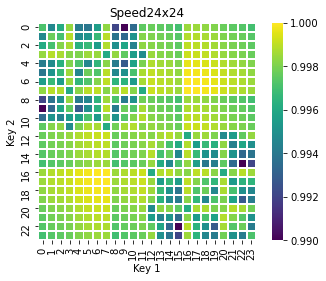

In [43]:
load_original_interkey_timings_table = False
if load_original_interkey_timings_table:

    interkey_table = "data/interkey-timings.xlsx"
    wb = xlrd.open_workbook(interkey_table) 
    interkey_sheet = wb.sheet_by_index(0)

    # Convert interkey stroke times table to array:
    Time32x32 = np.zeros((32,32))
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[i-1,j-1] = interkey_sheet.cell_value(i,j)

    # Fill empty (symmetric) portion of the array:
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[j-1,i-1] = interkey_sheet.cell_value(i,j)

    # Extract pairwise entries for the 24 vertical range keys:
    table_24_positions = [1,4,7,10, 2,5,8,11, 3,6,9,12,  19,22,25,28, 20,23,26,29, 21,24,27,30]
    Time24x24 = np.zeros((24, 24))
    u = 0
    for i in table_24_positions:
        u += 1
        v = 0
        for j in table_24_positions:
            v += 1
            Time24x24[u-1,v-1] = Time32x32[i-1,j-1]

    # Save:
    file = open("Time24x24.txt", "w+")
    file.write(str(Time24x24))
    file.close()

    # Print:
    print(repr(Time24x24))

else:
    Time24x24 = np.array([[196., 225., 204., 164., 266., 258., 231., 166., 357., 325., 263.,
        186., 169., 176., 178., 186., 156., 156., 158., 163., 171., 175., 177., 185.],
       [225., 181., 182., 147., 239., 245., 196., 150., 289., 296., 229.,
        167., 162., 169., 170., 178., 148., 148., 150., 155., 163., 167., 169., 177.],
       [204., 182., 170., 149., 196., 194., 232., 155., 237., 214., 263.,
        166., 157., 164., 165., 173., 143., 143., 145., 150., 158., 163., 164., 172.],
       [164., 147., 149., 169., 160., 161., 157., 226., 165., 185., 234.,
        257., 154., 162., 163., 171., 141., 141., 143., 148., 156., 160., 162., 170.],
       [266., 239., 196., 160., 196., 240., 208., 166., 271., 267., 208.,
        169., 143., 150., 151., 160., 129., 129., 132., 137., 145., 149., 151., 159.],
       [258., 245., 194., 161., 240., 181., 183., 149., 245., 256., 184.,
        150., 138., 145., 146., 154., 124., 124., 126., 131., 139., 144., 145., 153.],
       [231., 196., 232., 157., 208., 183., 170., 149., 201., 215., 239.,
        151., 134., 141., 142., 150., 120., 120., 122., 127., 135., 140., 141., 149.],
       [166., 150., 155., 226., 166., 149., 149., 169., 160., 147., 170.,
        221., 133., 140., 141., 150., 119., 119., 122., 126., 135., 139., 141., 149.],
       [357., 289., 237., 165., 271., 245., 201., 160., 196., 236., 194.,
        161., 171., 178., 179., 188., 157., 157., 160., 164., 173., 177., 179., 187.],
       [325., 296., 214., 185., 267., 256., 215., 147., 236., 181., 184.,
        157., 166., 173., 174., 182., 152., 152., 154., 159., 167., 172., 173., 181.],
       [263., 229., 263., 234., 208., 184., 239., 170., 194., 184., 170.,
        150., 159., 166., 167., 176., 145., 145., 148., 153., 161., 165., 167., 175.],
       [186., 167., 166., 257., 169., 150., 151., 221., 161., 157., 150.,
        169., 153., 160., 161., 169., 139., 139., 141., 146., 154., 159., 160., 168.],
       [169., 162., 157., 154., 143., 138., 134., 133., 171., 166., 159.,
        153., 151., 147., 141., 145., 188., 151., 142., 164., 213., 204., 162., 145.],
       [176., 169., 164., 162., 150., 145., 141., 140., 178., 173., 166.,
        160., 147., 151., 189., 209., 137., 207., 191., 206., 149., 227.,  208., 226.],
       [178., 170., 165., 163., 151., 146., 142., 141., 179., 174., 167.,
        161., 141., 189., 157., 253., 136., 188., 210., 231., 155., 226.,   239., 225.],
       [186., 178., 173., 171., 160., 154., 150., 150., 188., 182., 176.,
        169., 145., 209., 253., 170., 147., 206., 251., 233., 164., 268.,  362., 236.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 188., 137., 136., 147., 151., 133., 138., 152., 192., 149.,  139., 143.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 151., 207., 188., 206., 133., 151., 179., 183., 145., 204.,  183., 194.],
       [158., 150., 145., 143., 132., 126., 122., 122., 160., 154., 148.,
        141., 142., 191., 210., 251., 138., 179., 157., 240., 145., 185.,  208., 235.],
       [163., 155., 150., 148., 137., 131., 127., 126., 164., 159., 153.,
        146., 164., 206., 231., 233., 152., 183., 240., 170., 160., 220.,  293., 230.],
       [171., 163., 158., 156., 145., 139., 135., 135., 173., 167., 161.,
        154., 213., 149., 155., 164., 192., 145., 145., 160., 151., 140.,  142., 175.],
       [175., 167., 163., 160., 149., 144., 140., 139., 177., 172., 165.,
        159., 204., 227., 226., 268., 149., 204., 185., 220., 140., 151.,  175., 265.],
       [177., 169., 164., 162., 151., 145., 141., 141., 179., 173., 167.,
        160., 162., 208., 239., 362., 139., 183., 208., 293., 142., 175.,  157., 265.],
       [185., 177., 172., 170., 159., 153., 149., 149., 187., 181., 175.,
        168., 145., 226., 225., 236., 143., 194., 235., 230., 175., 265.,  265., 170.]])

# Left/right symmetric version of the Time24x24 matrix
# (The original version was constructed with data from right-handed people.)
TimeSymmetric24x24 = np.ones((24,24))

#        Left:            Right:
#     1  2  3  4       13 14 15 16 
#     5  6  7  8       17 18 19 20
#     9 10 11 12       21 22 23 24

I = [1,2,3,4, 5,6,7,8, 9,10,11,12,  16,15,14,13, 20,19,18,17, 24,23,22,21]
J = [16,15,14,13, 20,19,18,17, 24,23,22,21,  1,2,3,4, 5,6,7,8, 9,10,11,12]

for i1, I1 in enumerate(I):
    for i2, I2 in enumerate(I):
        J1 = J[i1] - 1
        J2 = J[i2] - 1
        #print(i1,i2,I1-1,I2-1,J1,J2)
        avgvalue = (Time24x24[I1-1,I2-1] + Time24x24[J1,J2]) / 2 
        TimeSymmetric24x24[I1-1,I2-1] = avgvalue
        TimeSymmetric24x24[J1,J2] = avgvalue

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = 1.0 - speed_factor  # np.min(TimeSymmetric24x24) / np.max(TimeSymmetric24x24)
newMax = 1.0
TimeSymmetric24x24 = newMin + (TimeSymmetric24x24 - np.min(TimeSymmetric24x24)) * (newMax - newMin) / (np.max(TimeSymmetric24x24) - np.min(TimeSymmetric24x24))

# Convert relative interkey stroke times to relative speeds by subtracting from 1:
Speed24x24 = 1 - TimeSymmetric24x24 + np.min(TimeSymmetric24x24)

# Print:
print_matrix_info(matrix_data=Speed24x24, matrix_label="Speed24x24", nkeys=24, nlines=50)
heatmap(data=Speed24x24, title="Speed24x24", xlabel="Key 1", ylabel="Key 2")

# Print:
#print(repr(Speed24x24))

# Save:
file = open("Speed24x24.txt", "w+")
file.write(str(Speed24x24))
file.close()


/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


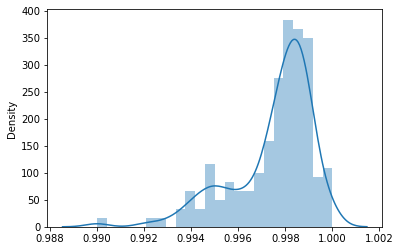

In [44]:
# Histogram
#if apply_speed:
sns_plot = sns.distplot(Speed24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("Speed24x24"))

Output:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Speed24x24 min = 0.0, max = 1.0
    Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.0)
        16 -> 23        (0.0)
        1 -> 10        (0.0)
        23 -> 16        (0.0)
        1 -> 9        (0.20935412026726052)
        16 -> 24        (0.20935412026726052)
        9 -> 1        (0.20935412026726052)
        24 -> 16        (0.20935412026726052)
        20 -> 23        (0.28285077951002224)
        23 -> 20        (0.28285077951002224)
        10 -> 5        (0.28285077951002224)
        5 -> 10        (0.28285077951002224)
        15 -> 23        (0.33853006681514475)
        23 -> 15        (0.33853006681514475)
        10 -> 2        (0.33853006681514475)
        2 -> 10        (0.33853006681514475)
        11 -> 1        (0.3474387527839644)
        22 -> 16        (0.3474387527839644)
        16 -> 22        (0.3474387527839644)
        1 -> 11        (0.3474387527839644)
        9 -> 2        (0.3853006681514477)
        15 -> 24        (0.3853006681514477)
        2 -> 9        (0.3853006681514477)
        24 -> 15        (0.3853006681514477)
        19 -> 16        (0.3964365256124721)
        1 -> 6        (0.3964365256124721)
        16 -> 19        (0.3964365256124721)
        6 -> 1        (0.3964365256124721)
        20 -> 24        (0.4142538975501113)
        10 -> 9        (0.4142538975501113)
        24 -> 23        (0.4142538975501113)
        5 -> 9        (0.4142538975501113)
        23 -> 24        (0.4142538975501113)
        9 -> 10        (0.4142538975501113)
        9 -> 5        (0.4142538975501113)
        24 -> 20        (0.4142538975501113)
        5 -> 1        (0.41870824053452116)
        20 -> 16        (0.41870824053452116)
        16 -> 20        (0.41870824053452116)
        1 -> 5        (0.41870824053452116)
        3 -> 11        (0.43875278396436523)
        14 -> 22        (0.43875278396436523)
        22 -> 14        (0.43875278396436523)
        11 -> 3        (0.43875278396436523)
        6 -> 5        (0.4610244988864143)
        6 -> 9        (0.4610244988864143)
        19 -> 24        (0.4610244988864143)
        20 -> 19        (0.4610244988864143)
        19 -> 20        (0.4610244988864143)
        24 -> 19        (0.4610244988864143)
    Speed24x24 key number pairs with maximum values:
        17 -> 8        (1.0)
        8 -> 17        (1.0)
        17 -> 7        (0.9977728285077951)
        18 -> 8        (0.9977728285077951)
        7 -> 17        (0.9977728285077951)
        8 -> 18        (0.9977728285077951)
        7 -> 18        (0.9955456570155902)
        18 -> 7        (0.9955456570155902)
        17 -> 6        (0.9821826280623608)
        7 -> 19        (0.9821826280623608)
        18 -> 6        (0.9821826280623608)
        19 -> 8        (0.9821826280623608)
        6 -> 18        (0.9821826280623608)
        19 -> 7        (0.9821826280623608)
        6 -> 17        (0.9821826280623608)
        8 -> 19        (0.9821826280623608)
        6 -> 19        (0.9688195991091314)
        19 -> 6        (0.9688195991091314)
        17 -> 5        (0.9621380846325167)
        5 -> 17        (0.9621380846325167)
        20 -> 8        (0.9621380846325167)
        8 -> 20        (0.9621380846325167)
        5 -> 18        (0.9599109131403119)
        7 -> 20        (0.9599109131403119)
        20 -> 7        (0.9599109131403119)
        18 -> 5        (0.9599109131403119)
        6 -> 20        (0.9443207126948775)
        19 -> 5        (0.9443207126948775)
        5 -> 19        (0.9443207126948775)
        20 -> 6        (0.9443207126948775)
        20 -> 5        (0.9198218262806236)
        8 -> 13        (0.9198218262806236)
        21 -> 8        (0.9198218262806236)
        21 -> 7        (0.9198218262806236)
        18 -> 12        (0.9198218262806236)
        17 -> 12        (0.9198218262806236)
        8 -> 21        (0.9198218262806236)
        7 -> 21        (0.9198218262806236)
        13 -> 8        (0.9198218262806236)
        17 -> 4        (0.9198218262806236)
        5 -> 20        (0.9198218262806236)
        12 -> 17        (0.9198218262806236)
        12 -> 18        (0.9198218262806236)
        4 -> 17        (0.9198218262806236)
        4 -> 18        (0.9175946547884187)
        18 -> 4        (0.9175946547884187)
        13 -> 7        (0.9175946547884187)
        7 -> 13        (0.9175946547884187)
        21 -> 6        (0.9064587973273942)
        19 -> 12        (0.9064587973273942)

## Strength matrix  <a name="strength">

### 24x24 relative finger position STRENGTH matrix

Finger strengths are based on peak keyboard reaction forces (in newtons) from Table 4 of <br>
"Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work" <br>
BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664:
   
    middle     2.36
    index      2.26
    ring       2.02
    little     1.84
    
    2.36/1.84 = 1.28
    2.36/2.02 = 1.17

For reference, Table 1 of "Ergonomic keyboard layout designed for the Filipino language", 2016 (doi: 10.1007/978-3-319-41694-6_41) presents "average finger strength of Filipinos [n=30, ages 16-36] measured in pounds":
   
                L       R
    little     3.77   4.27
    ring       4.54   5.08
    middle     5.65   6.37
    index      6.09   6.57
    
    6.57/4.27 = 1.54
    6.09/3.77 = 1.62
    6.37/5.08 = 1.25
    5.65/4.54 = 1.24
    
We won't use these results as I don't feel they represent relative strength relevant for typing: "Respondents were asked to sit in upright position, with their wrists resting on a flat surface. A pinch gauge was placed within each finger's reach. The respondents were asked to exert maximum pressure on the device."
    
The following does not take into account order of key pairs (see Flow matrix).


In [45]:
# Normalize by the highest peak force (middle finger):
middle_force = 2.36
index_force = 2.26
ring_force = 2.02
little_force = 1.84
middle_norm = 1.0
index_norm = index_force / middle_force
ring_norm = ring_force / middle_force
little_norm = little_force / middle_force

# Relative left/right hand strength (assume equal):
lf = 1.0
rf = 1.0

Strength24x24 min = 0.99, max = 1.0
Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.99)
        5 -> 9        (0.99)
        5 -> 16        (0.99)
        5 -> 20        (0.99)
        5 -> 24        (0.99)
        9 -> 1        (0.99)
        9 -> 5        (0.99)
        9 -> 9        (0.99)
        9 -> 16        (0.99)
        9 -> 20        (0.99)
Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)


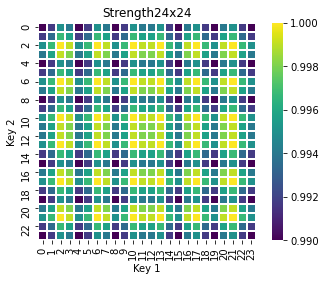

In [46]:
strengths24 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength24x24 = np.zeros((24, 24))
for i in range(24):
    Strength24x24[i,:] = strengths24
Strength24x24 = (Strength24x24 + Strength24x24.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = 1.0 - strength_factor  # np.min(Strength24x24) / np.max(Strength24x24)
newMax = 1.0
Strength24x24 = newMin + (Strength24x24 - np.min(Strength24x24)) * (newMax - newMin) / (np.max(Strength24x24) - np.min(Strength24x24))

# Print:
print_matrix_info(matrix_data=Strength24x24, matrix_label="Strength24x24", nkeys=24, nlines=10)
heatmap(data=Strength24x24, title="Strength24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Strength24x24.txt", "w+")
file.write(str(Strength24x24))
file.close()

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


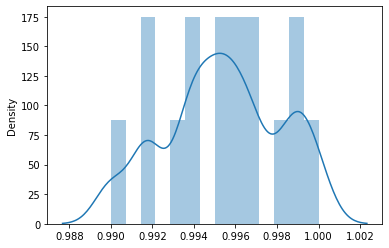

In [47]:
# Histogram
sns_plot = sns.distplot(Strength24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("Strength24x24"))

Strength32x32 min = 0.99, max = 1.0
Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.99)
        20 -> 5        (0.99)
        20 -> 1        (0.99)
        32 -> 31        (0.99)
        16 -> 31        (0.99)
        16 -> 24        (0.99)
        16 -> 20        (0.99)
        16 -> 16        (0.99)
        16 -> 9        (0.99)
        16 -> 5        (0.99)
Strength32x32 key number pairs with maximum values:
        22 -> 3        (1.0)
        18 -> 22        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 11        (1.0)
        7 -> 18        (1.0)
        11 -> 14        (1.0)
        7 -> 22        (1.0)
        11 -> 18        (1.0)
        14 -> 18        (1.0)


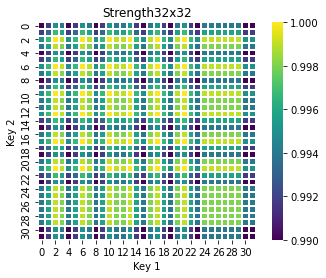

In [48]:
penalty = 1.0  # Penalty for lateral (index, little) finger placement (1 = no penalty)

strengths32 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        lf * index_norm * penalty, lf * index_norm * penalty, lf * index_norm * penalty,
                        rf * index_norm * penalty, rf * index_norm * penalty, rf * index_norm * penalty,
                        rf * little_norm * penalty, rf * little_norm * penalty))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength32x32 = np.zeros((32, 32))
for i in range(32):
    Strength32x32[i,:] = strengths32
Strength32x32 = (Strength32x32 + Strength32x32.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = 1.0 - strength_factor  # np.min(Strength32x32) / np.max(Strength32x32)
newMax = 1.0
Strength32x32 = newMin + (Strength32x32 - np.min(Strength32x32)) * (newMax - newMin) / (np.max(Strength32x32) - np.min(Strength32x32))

# Print:
print_matrix_info(matrix_data=Strength32x32, matrix_label="Strength32x32", nkeys=32, nlines=10)
heatmap(data=Strength32x32, title="Strength32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Strength32x32.txt", "w+")
file.write(str(Strength32x32))
file.close()

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


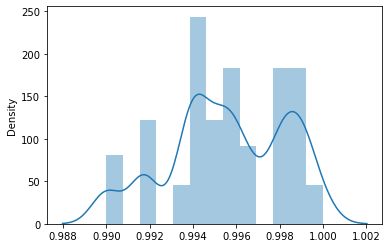

In [49]:
# Histogram
sns_plot = sns.distplot(Strength32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("Strength32x32"))

### Strength output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Strength24x24 min = 0.9, max = 1.0
Strength24x24 key number pairs with minimum values:

        1 -> 1        (0.9)
        5 -> 9        (0.9)
        5 -> 16        (0.9)
        5 -> 20        (0.9)
        5 -> 24        (0.9)
        9 -> 1        (0.9)
        9 -> 5        (0.9)
        9 -> 9        (0.9)
        9 -> 16        (0.9)
        9 -> 20        (0.9)

Strength24x24 key number pairs with maximum values:

        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)

## Flow matrix  <a name="flow">

The Flow24x24 matrix takes into account ease of transition between ordered pairs of keys

#### Dvorak et al. (1936) defined eleven criteria for the design and evaluation of keyboard layouts:
1.  Deviation from the balance of hand and finger loads should be as low as possible.
2.  Percentage of tapping with the same fingers should be as low as possible.
3.  Percentage of tapping that includes top row should be as low as possible.
4.  Percentage of tapping that includes bottom row should be as low as possible.
5.  Percentage of tapping in the home row should be as high as possible.
6.  Percentage of tapping by alternating hands should be as high as possible.
7.  Percentage of hurdles with the same finger should be as low as possible.
8.  Percentage of hurdles with adjacent fingers should be as low as possible.
9.  Percentage of hurdles with remote fingers should be as low as possible.
10. Percentage of reach with the same finger should be as low as possible.
11. Percentage of reach with adjacent fingers should be as low as possible.

#### Synopsis of above criteria for pairwise key presses when touch typing:
(A) 1,6.    Alternate between hands and balance finger loads. <br>
(B) 2,7,10. Avoid using the same finger. <br>
(C) 3,4,5.  Avoid the upper and lower rows. <br>
(D) 7,8,9.  Avoid skipping over the home row ("hurdling"). <br>
(E) 10,11.  Avoid tapping adjacent rows ("reaching") with (same or) adjacent fingers.

#### The approach here advocates the following related criteria (see above for complete list):

7.  Promote alternating between hands over uncomfortable transitions with the same hand.
8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
9.  Avoid stretching shorter fingers up and longer fingers down.
10. Avoid using the same finger.
11. Avoid the upper and lower rows.
12. Avoid skipping over the home row.

We will attempt to account for (A-E) by the rules to generate the Flow24x24 matrix. 
Additionally, left/right balance for (A) will be accounted for in part by
assigning the vowels and most common consonants to different sides of the keyboard.

### Factors to penalize difficult key transitions

Examples:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    key 10 to key 1: same_hand * roll_out * not_home_row * skip_home_row * side_top * side_up_1away_down * center_bottom = 0.9^6 = 0.531441
    key  9 to key 1: same_hand * same_finger * not_home_row * skip_home_row * side_top =  0.8 * 0.9^3 = 0.5832

    key 2 to key 7: same_hand * not_home_row * ring_up_middle_down = 0.9^2 = 0.81
    key 2 to key 6: same_hand * same_finger * not_home_row = 0.8 * 0.9 = 0.72

    key 11 to key 2: same_hand * roll_out * not_home_row * skip_home_row * center_bottom * ring_up_middle_down = 0.9^5 = 0.59049
    key 10 to key 2: same_hand * same_finger * not_home_row * skip_home_row * center_bottom = 0.8 * 0.9^3 = 0.5832

    key 12 to key 2: same_hand * roll_out * not_home_row * skip_home_row = 0.9^4 = 0.6561
    key 10 to key 2: same_hand * same_finger * not_home_row * skip_home_row * center_bottom = 0.8 * 0.9^3 = 0.5832

    key 12 to key 1: same_hand * roll_out * not_home_row * skip_home_row * side_top = 0.9^5 = 0.59049
    key  9 to key 1: same_hand * same_finger * not_home_row * skip_home_row * side_top = 0.8 * 0.9^3 = 0.5832

In [50]:
# Penalizing factors for 24 keys  (1 = no penalty; set to less than 1 to penalize):
same_hand = 1.0  # Taken care of by splitting up the most frequent letters across left/right sides above
same_finger = 0.8  # use same finger twice for a non-repeating letter (worse than 2 fingers)
roll_out = 0.9  # roll out from index to little finger
not_home_row = 0.9  # at least one key not on home row
skip_home_row = 0.9  # one key on top row, the other on bottom row
side_top = 0.9  # either index or little finger on top row
side_up_1away_down = 0.9  # index above middle, or little above ring 
side_up_2away_down = 0.95  # index above ring, or little above middle
side_up_3away_down = 1.0  # index above little, or little above index -- assumed to be negligible
center_bottom = 0.9  # either middle or ring finger on bottom row
ring_up_middle_down = 0.9  # ring above middle

# Penalizing factor for 32 keys:
lateral = 0.9 # lateral movement of (index or little) finger outside of 8 vertical columns

#         Left:             Right:
#     1  2  3  4 25   28 13 14 15 16 31 
#     5  6  7  8 26   29 17 18 19 20 32
#     9 10 11 12 27   30 21 22 23 24

#### 24 keys:

Flow24x24 min = 0.5314410000000002, max = 1.0
Flow24x24 key number pairs with minimum values:
        23 -> 16        (0.5314410000000002)
        10 -> 1        (0.5314410000000002)
        4 -> 11        (0.5314410000000002)
        13 -> 22        (0.5314410000000002)
        4 -> 10        (0.5609655000000001)
        22 -> 16        (0.5609655000000001)
        11 -> 1        (0.5609655000000001)
        13 -> 23        (0.5609655000000001)
        3 -> 11        (0.5832000000000002)
        24 -> 16        (0.5832000000000002)
Flow24x24 key number pairs with maximum values:
        5 -> 18        (1.0)
        20 -> 18        (1.0)
        5 -> 17        (1.0)
        5 -> 19        (1.0)
        5 -> 20        (1.0)
        19 -> 17        (1.0)
        19 -> 18        (1.0)
        19 -> 19        (1.0)
        6 -> 6        (1.0)
        6 -> 7        (1.0)


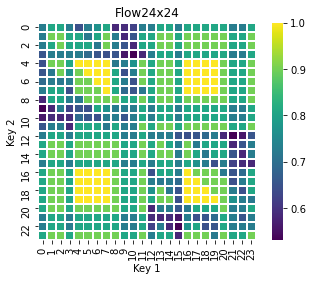

In [51]:
def create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down):

    all_24_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((24, 24))

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in range(0,12):
            for j in range(0,12):
                T[i,j] *= same_hand
        for i in range(12,24):
            for j in range(12,24):
                T[i,j] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
    if roll_out < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= roll_out

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= roll_out

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= roll_out

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= roll_out

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    if side_top:
        for x in all_24_keys:
            for y in [1,4,13,16]:
                T[x-1, y-1] *= side_top
                T[y-1, x-1] *= side_top
    if center_bottom:
        for x in all_24_keys:
            for y in [10,11,22,23]:
                T[x-1, y-1] *= center_bottom
                T[y-1, x-1] *= center_bottom

    if side_up_1away_down < 1.0 or side_up_2away_down < 1.0 or side_up_3away_down < 1.0 or ring_up_middle_down < 1.0:
        side_up_1away_downs = [[1,6],  [1,10], [5,10],   [7,4],  [11,4], [11,8], 
                               [16,19],[16,23],[20,23],  [18,13],[22,13],[22,17]]
        side_up_2away_downs = [[1,7],  [1,11], [5,11],   [6,4],  [10,4], [10,8], 
                               [16,18],[16,22],[20,22],  [19,13],[23,13],[23,17]]
        side_up_3away_downs = [[1,8],  [1,12], [5,12],   [5,4],  [9,4],  [9,8], 
                               [16,17],[16,21],[20,21],  [20,13],[24,13],[24,17]]
        ring_up_middle_downs = [[2,7],[6,11],[2,11], [15,18],[19,22],[15,22]]
        if side_up_1away_down < 1.0:
            for x in side_up_1away_downs:
                T[x[0]-1, x[1]-1] *= side_up_1away_down
                T[x[1]-1, x[0]-1] *= side_up_1away_down
        if side_up_2away_down < 1.0:
            for x in side_up_2away_downs:
                T[x[0]-1, x[1]-1] *= side_up_2away_down
                T[x[1]-1, x[0]-1] *= side_up_2away_down
        if side_up_3away_down < 1.0:
            for x in side_up_3away_downs:
                T[x[0]-1, x[1]-1] *= side_up_3away_down
                T[x[1]-1, x[0]-1] *= side_up_3away_down
        if ring_up_middle_down < 1.0:
            for x in ring_up_middle_downs:
                T[x[0]-1, x[1]-1] *= ring_up_middle_down
                T[x[1]-1, x[0]-1] *= ring_up_middle_down

    # 10. Avoid using the same finger.
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4, 9,10,11,12, 13,14,15,16, 21,22,23,24]
        home_row_keys = [5,6,7,8, 17,18,19,20]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    if skip_home_row < 1.0:
        skip_home_rows_left = [[1,2,3,4], [9,10,11,12]] 
        skip_home_rows_right = [[13,14,15,16], [21,22,23,24]] 
        for x in skip_home_rows_left[0]:
            for y in skip_home_rows_left[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row
        for x in skip_home_rows_right[0]:
            for y in skip_home_rows_right[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row

    Flow24x24 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow24x24) / np.max(Flow24x24)
    newMax = 1.0
    Flow24x24 = newMin + (Flow24x24 - np.min(Flow24x24)) * (newMax - newMin) / (np.max(Flow24x24) - np.min(Flow24x24))

    return Flow24x24

Flow24x24 = create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)

# Print:
print_matrix_info(matrix_data=Flow24x24, matrix_label="Flow24x24", nkeys=24, nlines=10)
heatmap(data=Flow24x24, title="Flow24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Flow24x24.txt", "w+")
file.write(str(Flow24x24))
file.close()

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


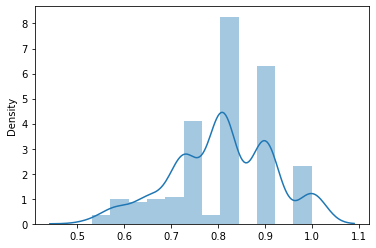

In [52]:
# Histogram
sns_plot = sns.distplot(Flow24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("Flow24x24"))

#### 32 keys:

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24


Flow32x32 min = 0.42515280000000016, max = 1.0
Flow32x32 key number pairs with minimum values:
        24 -> 31        (0.42515280000000016)
        25 -> 12        (0.42515280000000016)
        28 -> 21        (0.42515280000000016)
        21 -> 28        (0.47239200000000003)
        30 -> 28        (0.47239200000000003)
        27 -> 4        (0.47239200000000003)
        30 -> 13        (0.47239200000000003)
        31 -> 24        (0.47239200000000003)
        28 -> 30        (0.47239200000000003)
        27 -> 25        (0.47239200000000003)
Flow32x32 key number pairs with maximum values:
        18 -> 18        (1.0)
        5 -> 5        (1.0)
        7 -> 20        (1.0)
        17 -> 17        (1.0)
        20 -> 20        (1.0)
        20 -> 19        (1.0)
        20 -> 18        (1.0)
        20 -> 17        (1.0)
        18 -> 5        (1.0)
        18 -> 6        (1.0)


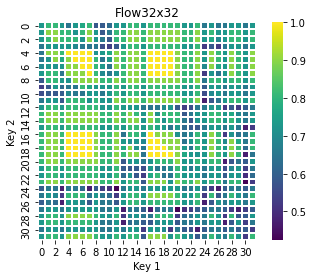

In [53]:
def create_32x32_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down):

    all_32_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24, 
                   25,26,27, 28,29,30, 31,32]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((32, 32))

    # Penalize (index, little) finger lateral movements:
    if lateral < 1.0:
        for x in all_32_keys:
            for y in [25,26,27,28,29,30,31,32]:
                T[x-1, y-1] *= lateral
                T[y-1, x-1] *= lateral    

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                T[i-1,j-1] *= same_hand
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                T[i-1,j-1] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
    if roll_out < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [4,25],[8,26],[12,27],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [13,28],[17,29],[21,30],[31,16],[32,20]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= roll_out

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [1,25],[2,25],[3,25],
                              [5,26],[6,26],[7,26],
                              [9,27],[10,27],[11,27],
                              [9,30],[10,30],[11,30],[12,30],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                              [16,28],[15,28],[14,28],
                              [20,29],[19,29],[18,29],
                              [24,30],[23,30],[22,30],
                              [31,15],[31,14],[31,13],[31,28],
                              [32,19],[32,18],[32,17],[32,29]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= roll_out

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [5,25],[6,25],[7,25],[8,25],[5,27],[6,27],[7,27],[8,27],
                             [1,26],[2,26],[3,26],[4,26],[9,26],[10,26],[11,26],[12,26],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                             [16,29],[15,29],[14,29],[13,29],[24,29],[23,29],[22,29],[21,29],
                             [20,28],[19,28],[18,28],[17,28],[20,30],[19,30],[18,30],[17,30],
                             [31,20],[31,19],[31,18],[31,17],[31,29],[32,16],[32,15],[32,14],[32,13],[32,28],
                             [32,24],[32,23],[32,22],[32,21],[32,30]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= roll_out

    #         Left:             Right:
    #     1  2  3  4 25   28 13 14 15 16 31 
    #     5  6  7  8 26   29 17 18 19 20 32
    #     9 10 11 12 27   30 21 22 23 24

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[1,27],[2,11],[2,12],[2,27],[3,12],[3,27],[4,27], 
                              [9,2],[9,3],[9,4],[9,25],[10,3],[10,4],[10,25],[11,4],[11,25],[12,25],
                              [16,23],[16,22],[16,21],[16,30],[15,22],[15,21],[15,30],[14,21],[14,30],[13,30],
                              [24,15],[24,14],[24,13],[24,28],[23,14],[23,13],[23,28],[22,13],[22,28],[21,28],
                              [31,24],[31,23],[31,22],[31,21],[31,30]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= roll_out

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    if side_top:
        for x in all_32_keys:
            for y in [1,4,25, 28,13,16,31]:
                T[x-1, y-1] *= side_top
                T[y-1, x-1] *= side_top

    if center_bottom:
        for x in all_32_keys:
            for y in [10,11,22,23]:
                T[x-1, y-1] *= center_bottom
                T[y-1, x-1] *= center_bottom

    if side_up_1away_down < 1.0 or side_up_2away_down < 1.0 or side_up_3away_down < 1.0 or ring_up_middle_down < 1.0:
        side_up_1away_downs = [[1,6],  [1,10], [5,10],   [7,4],  [11,4], [11,8],
                               [8,25],[12,25],[12,26],   [17,28],[21,28],[21,29], 
                               [20,31],[24,31],[24,32],
                               [16,19],[16,23],[20,23],  [18,13],[22,13],[22,17]]
        side_up_2away_downs = [[1,7],  [1,11], [5,11],   [6,4],  [10,4], [10,8], 
                               [7,25], [11,25], [11,26], [3,26], [3,27], [7,27],
                               [16,18],[16,22],[20,22],  [19,13],[23,13],[23,17],
                               [14,29],[14,30],[18,30],  [22,29],[22,28],[18,28],
                               [31,19],[31,23],[32,23]]
        side_up_3away_downs = [[1,8],  [1,12], [5,12],   [5,4],  [9,4],  [9,8],
                               [2,26], [2,27], [6,27],   [6,25], [10,25],[10,26],
                               [16,17],[16,21],[20,21],  [20,13],[24,13],[24,17],
                               [15,29],[15,30],[19,30],  [19,28],[23,28],[23,29],
                               [31,18],[31,22],[32,22],  [32,14]]
        ring_up_middle_downs = [[2,7],[6,11],[2,11], [15,18],[19,22],[15,22]]
        if side_up_1away_down < 1.0:
            for x in side_up_1away_downs:
                T[x[0]-1, x[1]-1] *= side_up_1away_down
                T[x[1]-1, x[0]-1] *= side_up_1away_down
        if side_up_2away_down < 1.0:
            for x in side_up_2away_downs:
                T[x[0]-1, x[1]-1] *= side_up_2away_down
                T[x[1]-1, x[0]-1] *= side_up_2away_down
        if side_up_3away_down < 1.0:
            for x in side_up_3away_downs:
                T[x[0]-1, x[1]-1] *= side_up_3away_down
                T[x[1]-1, x[0]-1] *= side_up_3away_down
        if ring_up_middle_down < 1.0:
            for x in ring_up_middle_downs:
                T[x[0]-1, x[1]-1] *= ring_up_middle_down
                T[x[1]-1, x[0]-1] *= ring_up_middle_down

    # 10. Avoid using the same finger.
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [25,26],[26,27],[25,27],[28,29],[29,30],[28,30],[31,32],
                        [4,25],[4,26],[4,27],[8,25],[8,26],[8,27],[12,25],[12,26],[12,27],
                        [13,28],[13,29],[13,30],[17,28],[17,29],[17,30],[21,28],[21,29],[21,30],
                        [31,16],[31,20],[31,24],[32,16],[32,20],[32,24],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4,25, 9,10,11,12,27, 28,13,14,15,16,31, 30,21,22,23,24]
        home_row_keys = [5,6,7,8,26, 29,17,18,19,20,32]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    if skip_home_row < 1.0:
        skip_home_rows_left = [[1,2,3,4,25], [9,10,11,12,27]] 
        skip_home_rows_right = [[28,13,14,15,16,31], [30,21,22,23,24]] 
        for x in skip_home_rows_left[0]:
            for y in skip_home_rows_left[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row
        for x in skip_home_rows_right[0]:
            for y in skip_home_rows_right[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row

    Flow32x32 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow32x32) / np.max(Flow32x32)
    newMax = 1.0
    Flow32x32 = newMin + (Flow32x32 - np.min(Flow32x32)) * (newMax - newMin) / (np.max(Flow32x32) - np.min(Flow32x32))

    return Flow32x32
    
Flow32x32 = create_32x32_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)

# Print:
print_matrix_info(matrix_data=Flow32x32, matrix_label="Flow32x32", nkeys=32, nlines=10)
heatmap(data=Flow32x32, title="Flow32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Flow32x32.txt", "w+")
file.write(str(Flow32x32))
file.close()

#         Left:             Right:
#     1  2  3  4 25   28 13 14 15 16 31 
#     5  6  7  8 26   29 17 18 19 20 32
#     9 10 11 12 27   30 21 22 23 24

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


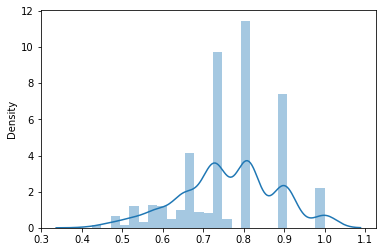

In [54]:
# Histogram
sns_plot = sns.distplot(Flow32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("Flow32x32"))

### Flow output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Flow24x24 min = 0.5314410000000002, max = 1.0
    Flow24x24 key number pairs with minimum values:

        23 -> 16        (0.5314410000000002)
        10 -> 1        (0.5314410000000002)
        4 -> 11        (0.5314410000000002)
        13 -> 22        (0.5314410000000002)
        4 -> 10        (0.5609655000000001)
        22 -> 16        (0.5609655000000001)
        11 -> 1        (0.5609655000000001)
        13 -> 23        (0.5609655000000001)
        3 -> 11        (0.5832000000000002)
        24 -> 16        (0.5832000000000002)

    Flow24x24 key number pairs with maximum values:

        5 -> 18        (1.0)
        20 -> 18        (1.0)
        5 -> 17        (1.0)
        5 -> 19        (1.0)
        5 -> 20        (1.0)
        19 -> 17        (1.0)
        19 -> 18        (1.0)
        19 -> 19        (1.0)
        6 -> 6        (1.0)
        6 -> 7        (1.0)
        
    Flow32x32 min = 0.37324800000000014, max = 1.0
    Flow32x32 key number pairs with minimum values:

        30 -> 28        (0.37324800000000014)
        28 -> 30        (0.37324800000000014)
        27 -> 25        (0.37324800000000014)
        25 -> 27        (0.37324800000000014)
        28 -> 21        (0.3779136000000001)
        25 -> 12        (0.3779136000000001)
        24 -> 31        (0.3779136000000001)
        29 -> 28        (0.41472000000000014)
        28 -> 29        (0.41472000000000014)
        25 -> 26        (0.41472000000000014)

    Flow32x32 key number pairs with maximum values:

        8 -> 20        (1.0)
        6 -> 19        (1.0)
        6 -> 6        (1.0)
        18 -> 6        (1.0)
        18 -> 7        (1.0)
        18 -> 8        (1.0)
        7 -> 20        (1.0)
        6 -> 7        (1.0)
        8 -> 8        (1.0)
        6 -> 8        (1.0)

## Combine Speed, Strength, and Flow matrices  <a name="speedstrengthflow">

SpeedStrengthFlow24x24 min = 0.5270463917307694, max = 1.0
SpeedStrengthFlow24x24 key number pairs with minimum values:
        23 -> 16        (0.5270463917307694)
        10 -> 1        (0.5270463917307694)
        4 -> 11        (0.5309299990384617)
        13 -> 22        (0.5309299990384617)
        11 -> 1        (0.5581606725000001)
        22 -> 16        (0.5581606725000001)
        4 -> 10        (0.558592184423077)
        13 -> 23        (0.558592184423077)
        16 -> 24        (0.5773680000000001)
        24 -> 16        (0.5773680000000001)
SpeedStrengthFlow24x24 key number pairs with maximum values:
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384

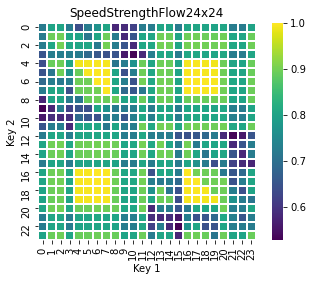

In [55]:
# 24 keys:
if apply_speed:
    SpeedStrengthFlow24x24 = Speed24x24 * Strength24x24 * Flow24x24
else:
    SpeedStrengthFlow24x24 = Strength24x24 * Flow24x24

# Print:
print_matrix_info(matrix_data=SpeedStrengthFlow24x24, matrix_label="SpeedStrengthFlow24x24", nkeys=24, nlines=10)
heatmap(data=SpeedStrengthFlow24x24, title="SpeedStrengthFlow24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("SpeedStrengthFlow24x24.txt", "w+")
file.write(str(SpeedStrengthFlow24x24))
file.close()

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


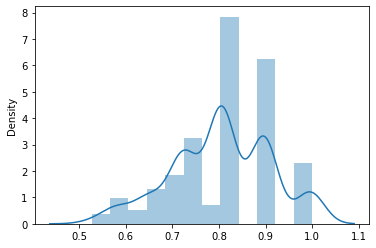

In [56]:
# Histogram
sns_plot = sns.distplot(SpeedStrengthFlow24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("SpeedStrengthFlow24x24"))

SpeedStrengthFlow32x32 min = 0.42090127200000016, max = 1.0
SpeedStrengthFlow32x32 key number pairs with minimum values:
        24 -> 31        (0.42090127200000016)
        25 -> 12        (0.4243351984615386)
        28 -> 21        (0.4243351984615386)
        31 -> 24        (0.46766808000000004)
        16 -> 31        (0.46766808000000015)
        20 -> 31        (0.46766808000000015)
        25 -> 27        (0.47148355384615387)
        28 -> 30        (0.47148355384615387)
        27 -> 25        (0.47148355384615387)
        21 -> 28        (0.47148355384615387)
SpeedStrengthFlow32x32 key number pairs with maximum values:
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        7 -> 18        (1.0)
        18 -> 18        (1.0)
        7 -> 17        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        7 -> 8        (

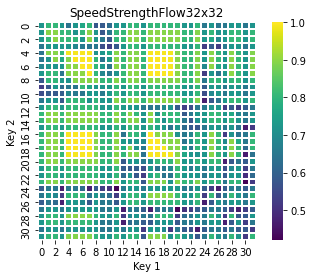

In [57]:
# 32 keys:
if apply_speed:
    SpeedStrengthFlow32x32 = Speed32x32 * Strength32x32 * Flow32x32
else:
    SpeedStrengthFlow32x32 = Strength32x32 * Flow32x32

# Print:
print_matrix_info(matrix_data=SpeedStrengthFlow32x32, matrix_label="SpeedStrengthFlow32x32", nkeys=32, nlines=10)
heatmap(data=SpeedStrengthFlow32x32, title="SpeedStrengthFlow32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("SpeedStrengthFlow32x32.txt", "w+")
file.write(str(SpeedStrengthFlow32x32))
file.close()

/home/arno/Software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


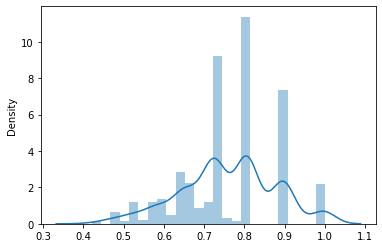

In [58]:
# Histogram
sns_plot = sns.distplot(SpeedStrengthFlow32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("SpeedStrengthFlow32x32"))

### Combined output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    SpeedStrengthFlow24x24 min = 0.5270463917307694, max = 1.0
    SpeedStrengthFlow24x24 key number pairs with minimum values:
        23 -> 16        (0.5270463917307694)
        10 -> 1        (0.5270463917307694)
        4 -> 11        (0.5309299990384617)
        13 -> 22        (0.5309299990384617)
        11 -> 1        (0.5581606725000001)
        22 -> 16        (0.5581606725000001)
        4 -> 10        (0.558592184423077)
        13 -> 23        (0.558592184423077)
        16 -> 24        (0.5773680000000001)
        24 -> 16        (0.5773680000000001)

    SpeedStrengthFlow24x24 key number pairs with maximum values:
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384615)

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24

    SpeedStrengthFlow32x32 min = 0.3725302153846155, max = 1.0
    SpeedStrengthFlow32x32 key number pairs with minimum values:
        27 -> 25        (0.3725302153846155)
        25 -> 27        (0.3725302153846155)
        28 -> 30        (0.3725302153846155)
        30 -> 28        (0.3725302153846155)
        24 -> 31        (0.3741344640000001)
        25 -> 12        (0.3771868430769232)
        28 -> 21        (0.3771868430769232)
        32 -> 31        (0.4105728000000001)
        31 -> 32        (0.4105728000000001)
        28 -> 29        (0.4139224615384617)
    SpeedStrengthFlow32x32 key number pairs with maximum values:
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        7 -> 18        (1.0)
        8 -> 18        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        17 -> 7        (0.9990384615384615)

## Step 1: Define the shape of the key layout to minimize lateral finger movements<a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, Z and Q, to the two hardest-to-reach keys lying outside the 24-key columns in the upper right:

        Left:            Right:
     1  2  3  4       13 14 15 16  Z
     5  6  7  8       17 18 19 20  Q
     9 10 11 12       21 22 23 24

## Step 2: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step2">

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in stages, based on ergonomic principles.
    
In prior experiments using the methods below, all vowels consistently automatically clustered together. Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters Z and Q there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, C, **U**, M, F, P, G, W, **Y**, B, V, K, X, J, Q, Z

We will assign the four most frequent vowels (E,A,O,I) to the most comfortable keys in the home and upper rows (keys 5-8 and 2-3) of one side, with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). The letter U may also take the less comfortable key 4. We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: TH, not HT) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to comfortable and efficient layouts:
    
    (1)  -  O  U  -
         I  -  E  A    

    (2)  -  -  U  - 
         I  O  E  A      

    (3)  -  -  -  U 
         I  O  E  A      

    (4)  -  -  O  U   
         I  -  E  A    

    (5)  -  -  O  U   
         -  I  E  A    

    (6)  -  I  O  U    
         -  -  E  A     

If we compare the relative comfort of typing 2-vowel letter sequences (bigrams) in the above layouts (see the list below of all 2-vowel bigrams with frequencies >1 billion from Peter Norvig's analysis of Google data), some bigrams are less comfortable to type either due to index-to-little finger roll-out vs. the more comfortable little-to-index finger roll-in ("x"), uncurling a smaller finger to reach the upper row ("#"), or repeated use of the same finger ("o"):
    
                            (1)  (2)  (3)  (4)  (5)  (6)          
     OU  24531132241 0.87%             #    #    #    #
     IO  23542263265 0.83%
     EA  19403941063 0.69%
     IE  10845731320                                  #
     AI   8922759715         x    x    x    x    x    x        
     IA   8072199471
     EI   5169898489         x    x    x    x    x    x    
     UE   4158448570         o    o    x#   x#   x#   x#   
     AU   3356322923         x    x    o#   o#   o#   o#    
     UI   2852182384         x    x    x#   x#   x#   x#   
     OI   2474275212         x    x    x    x    x    x    
     EO   2044268477         x    x    x    o    o    o    
     OA   1620913259
     OE   1089254517         #              o    o    o
    
Based on the above, we will select vowel arrangements 1 and 2.    
   
### Consonants

Next, to populate the home row on the other side of the keyboard, we examine all possible sequences of four letters from the eight most frequent consonants (T,N,S,R,H,L,D,C), covering half the alphabet, where each letter has at least 100 billion (at least 3% of) instances in Peter Norvig's analysis:

E, **T**, A, O, I, **N, S, R, H, L, D, C**, U, M, F, P, G, W, Y, B, V, K, X, J, Q, Z

These eight consonants are included among the highest frequency bigrams, listed below in bold, with more than 10 billion instances:

**TH, ND, ST, NT, CH, NS, CT, TR, RS, NC**, (RT), SH, LD, RD, LS, DS, LT, (TL), RL, HR, NL, (SL)
    
     TH 100272945963  3.56% 
     ND  38129777631  1.35%
     ST  29704461829  1.05%
     NT  29359771944  1.04%
     CH  16854985236  0.60%
     NS  14350320288   
     CT  12997849406
     TR  12006693396       
     RS  11180732354   
     NC  11722631112
    (RT  10198055461) 

To maximize the number of bigrams we can comfortably type, we select 4-consonant sequences that consist of three consecutive highest frequency (>10 billion instances) bigrams, such as NSTR = NS + ST + TR. We also restrict T to the strongest (middle or index) fingers, because T is the most frequent consonant. Below are the resulting 4 consonant sequences and number of left-to-right bigrams with at least 10 billion instances:

    N  S  T  H  (4)
    N  S  T  R  (4)
    N  C  T  H  (5)
    N  C  T  R  (4)
    
The resulting 2 arrangements of five vowels on the left and 4 arrangements of four consonants on the right gives us 8 layouts, each with 15 unassigned keys (letters on the right side are reversed, in case Hand 2 is assigned to the right hand):

        Hand 1            Hand 2
    -OU- I-EA ----    ---- HTSN ----
    -OU- I-EA ----    ---- RTSN ----
    -OU- I-EA ----    ---- HTCN ----
    -OU- I-EA ----    ---- RTCN ----
    --U- IOEA ----    ---- HTSN ----
    --U- IOEA ----    ---- RTSN ----
    --U- IOEA ----    ---- HTCN ----
    --U- IOEA ----    ---- RTCN ----

## Step 3: Optimize assignment of the remaining letters <a name="step3">
    
We want to assign the 15 missing letters to the unassigned keys in each of the above 8 layouts based on our scoring model. That would mean scoring all possible arrangements for each layout and choosing the arrangement with the highest score, but since there are over 1.3 trillion possible ways of arranging 15 letters (15! = 1,307,674,368,000), we will need to break up the assignment into two stages: first for the most frequent remaining letters, and second for the least frequent remaining letters. 
    
### Most frequent letters
First we will compute scores for every possible arrangement of the 9 most frequent remaining letters among those in bold below for the most comfortable of the remaining positions (4,9,12,13,14,15,21,24, and either 2 or 6):

E, T, A, O, I, N, **S, R, H, L, D, C**, U, **M, F, P, G, W**, Y, B, V, K, X, J, Q, Z

       Hand 1:          Hand 2:
     -  2  -  4       13 14 15  -
     -  6  -  -        -  -  -  -
     9  -  - 12       21  -  - 24
    
Since there are 9! = 362,880 possible combinations, and we have 8 layouts, we need to score and evaluate 2,903,040 combinations.  
    
To score each arrangement of letters, we construct a frequency matrix of each ordered pair of letters (bigram), and multiply this frequency matrix by our speed-strength-flow matrix to compute a score. 

In [19]:
data_matrix = SpeedStrengthFlow24x24
keys18 = [2,3, 5,6,7,8, 9,12, 13,14,15, 17,18,19,20, 21,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

# -OU- I-EA ----    ---- HTSN ----
letters = ['O','U','', 'I','','E','A', '','', '','','', 'H','T','S','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTSN ----
letters = ['O','U','', 'I','','E','A', '','', '','','', 'R','T','S','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- HTCN ----
letters = ['O','U','', 'I','','E','A', '','', '','','', 'H','T','C','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTCN ----
letters = ['O','U','', 'I','','E','A', '','', '','','', 'R','T','C','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTSN ----
letters = ['','U','', 'I','O','E','A', '','', '','','', 'H','T','S','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTSN ----
letters = ['','U','', 'I','O','E','A', '','', '','','', 'R','T','S','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTCN ----
letters = ['','U','', 'I','O','E','A', '','', '','','', 'H','T','C','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTCN ----
letters = ['','U','', 'I','O','E','A', '','', '','','', 'R','T','C','N', '','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys18, data_matrix, bigrams, bigram_frequencies, verbose, ntop)



362880: ['O' 'U' 'W' 'I' 'C' 'E' 'A' 'P' 'G' 'F' 'D' 'L' 'H' 'T' 'S' 'N' 'M' 'R'] 0.07209
Topmost of 362880 permutations: 0.07209054047927863
['O' 'U' 'W' 'I' 'C' 'E' 'A' 'P' 'G' 'F' 'D' 'L' 'H' 'T' 'S' 'N' 'M' 'R']
362880: ['O' 'U' 'F' 'I' 'H' 'E' 'A' 'P' 'G' 'W' 'M' 'D' 'R' 'T' 'S' 'N' 'C' 'L'] 0.07246
Topmost of 362880 permutations: 0.0724563111557846
['O' 'U' 'F' 'I' 'H' 'E' 'A' 'P' 'G' 'W' 'M' 'D' 'R' 'T' 'S' 'N' 'C' 'L']
362880: ['O' 'U' 'F' 'I' 'S' 'E' 'A' 'P' 'G' 'W' 'L' 'D' 'H' 'T' 'C' 'N' 'R' 'M'] 0.07200
Topmost of 362880 permutations: 0.07199836992679495
['O' 'U' 'F' 'I' 'S' 'E' 'A' 'P' 'G' 'W' 'L' 'D' 'H' 'T' 'C' 'N' 'R' 'M']
362880: ['O' 'U' 'F' 'I' 'H' 'E' 'A' 'P' 'G' 'W' 'L' 'D' 'R' 'T' 'C' 'N' 'S' 'M'] 0.07216
Topmost of 362880 permutations: 0.07216368617771245
['O' 'U' 'F' 'I' 'H' 'E' 'A' 'P' 'G' 'W' 'L' 'D' 'R' 'T' 'C' 'N' 'S' 'M']
362880: ['G' 'U' 'W' 'I' 'O' 'E' 'A' 'P' 'F' 'M' 'L' 'C' 'H' 'T' 'S' 'N' 'D' 'R'] 0.07227
Topmost of 362880 permutations: 0.0722707207217

### Top-scoring layouts with the most frequent letters

Each result below represents the top-scoring layout for one of the 8 vowel/consonant initializations above:

    -OU- I-EA ----    ---- HTSN ----

    - O U W    F D L -
    I C E A    H T S N
    P - - G    M - - R    0.07209054047927863    5

    -OU- I-EA ----    ---- RTSN ----

    - O U F    W M D -
    I H E A    R T S N
    P - - G    C - - L    0.0724563111557846     1

    -OU- I-EA ----    ---- HTCN ----

    - O U F    W L D -
    I S E A    H T C N
    P - - G    R - - M    0.07199836992679495    7

    -OU- I-EA ----    ---- RTCN ----

    - O U F    W L D -
    I H E A    R T C N
    P - - G    S - - M    0.07216368617771245    4

    --U- IOEA ----    ---- HTSN ----

    - G U W    M L C -
    I O E A    H T S N
    P - - F    D - - R    0.07227072072177251    3

    --U- IOEA ----    ---- RTSN ----

    - P U G    W M D -
    I O E A    R T S N
    H - - F    C - - L    0.07232784949080245    2

    --U- IOEA ----    ---- HTCN ----

    - G U W    M L D -
    I O E A    H T C N
    P - - F    S - - R    0.07197334256286803    8

    --U- IOEA ----    ---- RTCN ----

    - P U G    W L D -
    I O E A    R T C N
    H - - F    S - - M    0.0720355429360569     6

### Least frequent letters
Second, we will compute scores for every possible arrangement of the 8 least frequent letters (aside from Z and Q) in bold below for the least comfortable remaining positions (1,10,11,16,22,23, and again: 4,13):

E, T, A, O, I, N, S, R, H, L, D, C, U, M, F, P, **G, W, Y, B, V, K, X, J**, Q, Z

       Hand 1:          Hand 2:
     1  -  -  4       13  -  - 16
     -  -  -  -       -   -  -  -
     - 10 11  -       -  22 23  -   

Since there are 8! = 40,320 possible combinations, and we have 8 layouts, we need to score and evaluate 322,560 more combinations.

In [22]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

# -OU- I-EA ----    ---- HTSN ----
letters = ['','O','U','', 'I','C','E','A', 'P','','','G', '','D','L','', 'H','T','S','N', 'M','','','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTSN ----
letters = ['','O','U','', 'I','H','E','A', 'P','','','G', '','M','D','', 'R','T','S','N', 'C','','','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- HTCN ----
letters = ['','O','U','', 'I','S','E','A', 'P','','','G', '','L','D','', 'H','T','C','N', 'R','','','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTCN ----
letters = ['','O','U','', 'I','H','E','A', 'P','','','G', '','L','D','', 'R','T','C','N', 'S','','','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTSN ----
letters = ['','G','U','', 'I','O','E','A', 'P','','','F', '','L','C','', 'H','T','S','N', 'D','','','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTSN ----
letters = ['','P','U','', 'I','O','E','A', 'H','','','F', '','M','D','', 'R','T','S','N', 'C','','','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTCN ----
letters = ['','G','U','', 'I','O','E','A', 'P','','','F', '','L','D','', 'H','T','C','N', 'S','','','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTCN ----
letters = ['','P','U','', 'I','O','E','A', 'H','','','F', '','L','D','', 'R','T','C','N', 'S','','','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

40320: ['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R'] 0.04400
Topmost of 40320 permutations: 0.0440027892823964
['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L'] 0.04420
Topmost of 40320 permutations: 0.04420363256389518
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L']
40320: ['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M'] 0.04398
Topmost of 40320 permutations: 0.04397956323620221
['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'F' 'R' 'T'
 'C' 'N' 'S' 'W' 'B' 'M'] 0.04406
Topmost of 40320 permutations: 0.044060928417170284
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J

### Top-scoring layouts

Each result below represents the top-scoring layout for one of the 8 vowel/consonant initializations above:

    -OU- I-EA ----    ---- HTSN ----

    Y O U K    V D L B
    I C E A    H T S N
    P X J G    M F W R    0.0440027892823964      5

    -OU- I-EA ----    ---- RTSN ----

    Y O U X    W M D B
    I H E A    R T S N
    P K J G    C V F L    0.04420363256389518     1

    -OU- I-EA ----    ---- HTCN ----

    Y O U X    V L D W
    I S E A    H T C N
    P K J G    R F B M    0.04397956323620221     7->8

    -OU- I-EA ----    ---- RTCN ----

    Y O U X    V L D F
    I H E A    R T C N
    P K J G    S W B M    0.044060928417170284    4

    --U- IOEA ----    ---- HTSN ----

    Y G U X    V L C W
    I O E A    H T S N
    P K J F    D M B R    0.04412764170454838     3

    --U- IOEA ----    ---- RTSN ----

    Y P U X    G M D W
    I O E A    R T S N
    H K J F    C V B L    0.04413770436496156     2

    --U- IOEA ----    ---- HTCN ----

    Y G U X    V L D W
    I O E A    H T C N
    P K J F    S M B R    0.0439818604551193     8->7

    --U- IOEA ----    ---- RTCN ----

    Y P U X    G L D B
    I O E A    R T C N
    H K J F    S V W M    0.043986387195996485   6


The top 6 scores are in the same order as before, and there are clear consistencies across the winning letter arrangements of the 8 different layouts. Ignoring the middle rows the greatest consistencies appear to be on the "left" side:
  1. Top: Y is always assigned to the left and in all but one case X to the right.
  2. Top: G or P filled remaining vacancies.
  3. Bottom: K and J are in the middle in all but one case.


## Step 4: Stability Tests <a name="step4">
    
We will run three types of stability tests on the 8 winning layouts:
    
    1. Exchange letters in rows
    2. Compare effects of Flow, Strength, and/or Speed matrices
    3. Reset Engram scoring parameters

### Stability Test 1: Exchange letters in rows
    1A. Allow top and bottom rows to exchange letters on the left. [Result: no change]
    1B. Allow top and bottom rows to exchange letters on the right. [Result: add 3 layouts]
    1C. Allow bottom rows to exchange letters. [Result: add 1 layout]
    1D. Allow top rows to exchange letters. [Result: no change]
    1E. Allow top left and bottom right rows to exchange letters. [Result: no change]
    1F. Allow top right and bottom left rows to exchange letters. [Result: no change]
    
#### Test 1A: Allow top and bottom rows to exchange letters on the left.

In [23]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

# -OU- I-EA ----    ---- HTSN ----
letters = ['','O','U','','I','C','E','A','','','','','V','D','L','B','H','T','S','N','M','F','W','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTSN ----
letters = ['','O','U','X','I','H','E','A','','','','','W','M','D','B','R','T','S','N','C','V','F','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- HTCN ----
letters = ['','O','U','X','I','S','E','A','','','','','V','L','D','W','H','T','C','N','R','F','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTCN ----
letters = ['','O','U','X','I','H','E','A','','','','','V','L','D','F','R','T','C','N','S','W','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTSN ----
letters = ['','','U','','I','O','E','A','','','','','V','L','C','W','H','T','S','N','D','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTSN ----
letters = ['','','U','','I','O','E','A','','','','','G','M','D','W','R','T','S','N','C','V','B','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTCN ----
letters = ['','','U','','I','O','E','A','','','','','V','L','D','W','H','T','C','N','S','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTCN ----
letters = ['','','U','','I','O','E','A','','','','','G','L','D','B','R','T','C','N','S','V','W','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

720: ['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R'] 0.04400
Topmost of 720 permutations: 0.0440027892823964
['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R']
120: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L'] 0.04420
Topmost of 120 permutations: 0.04420363256389518
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L']
120: ['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M'] 0.04398
Topmost of 120 permutations: 0.04397956323620221
['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M']
120: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'F' 'R' 'T'
 'C' 'N' 'S' 'W' 'B' 'M'] 0.04406
Topmost of 120 permutations: 0.044060928417170284
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D

Test 1A results: identical

#### Test 1B: Allow top and bottom rows to exchange letters on the right.

In [24]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

# -OU- I-EA ----    ---- HTSN ----
letters = ['Y','O','U','K','I','C','E','A','P','X','J','G','','','','','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTSN ----
letters = ['Y','O','U','X','I','H','E','A','P','K','J','G','','','','','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- HTCN ----
letters = ['Y','O','U','X','I','S','E','A','P','K','J','G','','','','','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- RTCN ----
letters = ['Y','O','U','X','I','H','E','A','P','K','J','G','','','','','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTSN ----
letters = ['Y','G','U','X','I','O','E','A','P','K','J','F','','','','','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTSN ----
letters = ['Y','P','U','X','I','O','E','A','H','K','J','F','','','','','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- HTCN ----
letters = ['Y','G','U','X','I','O','E','A','P','K','J','F','','','','','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- RTCN ----
letters = ['Y','P','U','X','I','O','E','A','H','K','J','F','','','','','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)


40320: ['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'M' 'D' 'W' 'H' 'T'
 'S' 'N' 'L' 'F' 'B' 'R'] 0.04401
Topmost of 40320 permutations: 0.04400987045810908
['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'M' 'D' 'W' 'H' 'T'
 'S' 'N' 'L' 'F' 'B' 'R']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M'] 0.04422
Topmost of 40320 permutations: 0.04422122832510581
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M']
40320: ['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M'] 0.04398
Topmost of 40320 permutations: 0.04397956323620221
['Y' 'O' 'U' 'X' 'I' 'S' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'W' 'H' 'T'
 'C' 'N' 'R' 'F' 'B' 'M']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'V' 'L' 'D' 'F' 'R' 'T'
 'C' 'N' 'S' 'W' 'B' 'M'] 0.04406
Topmost of 40320 permutations: 0.044060928417170284
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' '

Test 1B results: Three layouts changed. This does not affect Test 1A results. We will add these three new layouts for further testing:

    -OU- I-EA ----    ---- HTSN ----
    old: ['V','D','L','B',...'M','F','W','R']    0.0440027892823964     5
    new: ['V' 'M' 'D' 'W'    'L' 'F' 'B' 'R']    0.04400987045810908    5
 
    -OU- I-EA ----    ---- RTSN ----
    old: ['W','M','D','B',...'C','V','F','L']    0.04420363256389518    1
    new: ['W' 'D' 'C' 'V'    'L' 'B' 'F' 'M']    0.04422122832510581    1

    --U- IOEA ----    ---- RTSN ----
    old: ['G','M','D','W',...'C','V','B','L']    0.04413770436496156    2  
    new: ['G' 'D' 'C' 'W'    'L' 'V' 'B' 'M']    0.044149188521122006   2 

#### Test 1C: Allow bottom rows to exchange letters.

In [28]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

# -OU- I-EA ----    ---- NSTH ----
#letters = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','D','L','B','H','T','S','N','M','F','W','R']
letters = ['Y','O','U','K','I','C','E','A','','','','','V','D','L','B','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# New: -OU- I-EA ----    ---- NSTH ----    
#letters = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','M','D','W','H','T','S','N','L','F','B','R']
letters = ['Y','O','U','K','I','C','E','A','','','','','V','M','D','W','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- NSTR ----
#letters = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','M','D','B','R','T','S','N','C','V','F','L']
letters = ['Y','O','U','X','I','H','E','A','','','','','W','M','D','B','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# New: -OU- I-EA ----    ---- NSTR ----    
#letters = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','D','C','V','R','T','S','N','L','B','F','M']
letters = ['Y','O','U','X','I','H','E','A','','','','','W','D','C','V','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- NCTH ----
#letters = ['Y','O','U','X','I','S','E','A','P','K','J','G','V','L','D','W','H','T','C','N','R','F','B','M']
letters = ['Y','O','U','X','I','S','E','A','','','','','V','L','D','W','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# -OU- I-EA ----    ---- NCTR ----
#letters = ['Y','O','U','X','I','H','E','A','P','K','J','G','V','L','D','F','R','T','C','N','S','W','B','M']
letters = ['Y','O','U','X','I','H','E','A','','','','','V','L','D','F','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- NSTH ----
#letters = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','C','W','H','T','S','N','D','M','B','R']
letters = ['Y','G','U','X','I','O','E','A','','','','','V','L','C','W','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- NSTR ----
#letters = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','M','D','W','R','T','S','N','C','V','B','L']
letters = ['Y','P','U','X','I','O','E','A','','','','','G','M','D','W','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# New: --U- IOEA ----    ---- NSTR ----    
#letters = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','D','C','W','R','T','S','N','L','V','B','M']
letters = ['Y','P','U','X','I','O','E','A','','','','','G','D','C','W','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- NCTH ----
#letters = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','D','W','H','T','C','N','S','M','B','R']
letters = ['Y','G','U','X','I','O','E','A','','','','','V','L','D','W','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# --U- IOEA ----    ---- NCTR ----
#letters = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','L','D','B','R','T','C','N','S','V','W','M']
letters = ['Y','P','U','X','I','O','E','A','','','','','G','L','D','B','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)


40320: ['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R'] 0.04400
Topmost of 40320 permutations: 0.0440027892823964
['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'D' 'L' 'B' 'H' 'T'
 'S' 'N' 'M' 'F' 'W' 'R']
40320: ['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'M' 'D' 'W' 'H' 'T'
 'S' 'N' 'L' 'F' 'B' 'R'] 0.04401
Topmost of 40320 permutations: 0.04400987045810908
['Y' 'O' 'U' 'K' 'I' 'C' 'E' 'A' 'P' 'X' 'J' 'G' 'V' 'M' 'D' 'W' 'H' 'T'
 'S' 'N' 'L' 'F' 'B' 'R']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C'] 0.04421
Topmost of 40320 permutations: 0.04420923368982145
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M'] 0.04422
Topmost of 40320 permutations: 0.04422122832510581
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J'

Test 1C results: Two layouts changed, but in only one of them did a single letter pair get swapped across left and right sides, so it is unlikely that it will impact prior test results. We will include these two new layouts in our evaluation, and remove the lower-scoring layout where two letters are swapped within the same row:

-OU- I-EA ----    ---- RTSN ----

    Old:
    Y O U X    W M D B
    I H E A    R T S N
    P K J G    C V F L    0.04420363256389518 (remove)

    New:
    Y O U X    W M D B
    I H E A    R T S N
    P K J G    L V F C    0.04420923368982145 (replace)

--U- IOEA ----    ---- HTSN ----

    Old:
    Y G U X    V L C W
    I O E A    H T S N
    P K J F    D M B R    0.04412764170454838      
 
    New:
    Y G U X    V L C W
    I O E A    H T S N
    P K J D    R F B M    0.0441283811283957       


Ordering all 12 top-scoring layouts:

    Y O U X    W D C V
    I H E A    R T S N
    P K J G    L B F M    0.04422122832510581     1

    Y O U X    W M D B
    I H E A    R T S N
    P K J G    L V F C    0.04420923368982145     2

    Y P U X    G D C W
    I O E A    R T S N
    H K J F    L V B M    0.044149188521122006    3

    Y P U X    G M D W
    I O E A    R T S N
    H K J F    C V B L    0.04413770436496156     4

    Y G U X    V L C W
    I O E A    H T S N
    P K J D    R F B M    0.0441283811283957      5

    Y G U X    V L C W
    I O E A    H T S N
    P K J F    D M B R    0.04412764170454838     6

    Y O U X    V L D F
    I H E A    R T C N
    P K J G    S W B M    0.044060928417170284    7

    Y O U K    V M D W
    I C E A    H T S N
    P X J G    L F B R    0.04400987045810908     8

    Y O U K    V D L B
    I C E A    H T S N
    P X J G    M F W R    0.0440027892823964      9

    Y P U X    G L D B
    I O E A    R T C N
    H K J F    S V W M    0.043986387195996485    10

    Y G U X    V L D W
    I O E A    H T C N
    P K J F    S M B R    0.0439818604551193      11

    Y O U X    V L D W
    I S E A    H T C N
    P K J G    R F B M    0.04397956323620221     12


#### Test 1D: Allow top rows to exchange letters.

In [31]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

letters = ['','O','U','','I','H','E','A','P','K','J','G','','','','','R','T','S','N','L','B','F','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','P','K','J','G','','','','','R','T','S','N','L','V','F','C']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','','','','','R','T','S','N','L','V','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','','','','','R','T','S','N','C','V','B','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','D','','','','','H','T','S','N','R','F','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','F','','','','','H','T','S','N','D','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','P','K','J','G','','','','','R','T','C','N','S','W','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','C','E','A','P','X','J','G','','','','','H','T','S','N','L','F','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','C','E','A','P','X','J','G','','','','','H','T','S','N','M','F','W','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','','','','','R','T','C','N','S','V','W','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','F','','','','','H','T','C','N','S','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','S','E','A','P','K','J','G','','','','','H','T','C','N','R','F','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

720: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C'] 0.04421
Topmost of 720 permutations: 0.04420923368982145
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C']
720: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L'] 0.04420
Topmost of 720 permutations: 0.04420363256389518
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L']


Test 1D results: identical

#### Test 1E: Allow top left and bottom right rows to exchange letters.

In [30]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

letters = ['','O','U','','I','H','E','A','P','K','J','G','W','D','C','V','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','P','K','J','G','W','M','D','B','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','G','D','C','W','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','G','M','D','W','R','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','D','V','L','C','W','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','F','V','L','C','W','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','H','E','A','P','K','J','G','V','L','D','F','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','C','E','A','P','X','J','G','V','M','D','W','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','C','E','A','P','X','J','G','V','D','L','B','H','T','S','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','H','K','J','F','G','L','D','B','R','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','','U','','I','O','E','A','P','K','J','F','V','L','D','W','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['','O','U','','I','S','E','A','P','K','J','G','V','L','D','W','H','T','C','N','','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

720: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M'] 0.04422
Topmost of 720 permutations: 0.04422122832510581
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M']
720: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C'] 0.04421
Topmost of 720 permutations: 0.04420923368982145
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C']
720: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C'] 0.04421
Topmost of 720 permutations: 0.04420923368982145
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C']
5040: ['Y' 'P' 'U' 'X' 'I' 'O' 'E' 'A' 'H' 'K' 'J' 'F' 'G' 'D' 'C' 'W' 'R' 'T'
 'S' 'N' 'L' 'V' 'B' 'M'] 0.04415
Topmost of 5040 permutations: 0.044149188521122006
['Y' 'P' 'U' 'X' 'I' 'O' 'E' 'A' 'H' 'K' 'J' 'F' 'G' 'D'

Test 1E results: identical

#### Test 1F: Allow top right and bottom left rows to exchange letters.

In [32]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
verbose = True
ntop = 0

letters = ['Y','O','U','X','I','H','E','A','','','','','','','','','R','T','S','N','L','B','F','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','O','U','X','I','H','E','A','','','','','','','','','R','T','S','N','L','V','F','C']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','P','U','X','I','O','E','A','','','','','','','','','R','T','S','N','L','V','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','P','U','X','I','O','E','A','','','','','','','','','R','T','S','N','C','V','B','L']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','G','U','X','I','O','E','A','','','','','','','','','H','T','S','N','R','F','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','G','U','X','I','O','E','A','','','','','','','','','H','T','S','N','D','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','O','U','X','I','H','E','A','','','','','','','','','R','T','C','N','S','W','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','O','U','K','I','C','E','A','','','','','','','','','H','T','S','N','L','F','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','O','U','K','I','C','E','A','','','','','','','','','H','T','S','N','M','F','W','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','P','U','X','I','O','E','A','','','','','','','','','R','T','C','N','S','V','W','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','G','U','X','I','O','E','A','','','','','','','','','H','T','C','N','S','M','B','R']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

letters = ['Y','O','U','X','I','S','E','A','','','','','','','','','H','T','C','N','R','F','B','M']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M'] 0.04422
Topmost of 40320 permutations: 0.04422122832510581
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'D' 'C' 'V' 'R' 'T'
 'S' 'N' 'L' 'B' 'F' 'M']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C'] 0.04421
Topmost of 40320 permutations: 0.04420923368982145
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'L' 'V' 'F' 'C']
40320: ['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L'] 0.04420
Topmost of 40320 permutations: 0.04420363256389518
['Y' 'O' 'U' 'X' 'I' 'H' 'E' 'A' 'P' 'K' 'J' 'G' 'W' 'M' 'D' 'B' 'R' 'T'
 'S' 'N' 'C' 'V' 'F' 'L']
40320: ['Y' 'P' 'U' 'X' 'I' 'O' 'E' 'A' 'H' 'K' 'J' 'F' 'G' 'D' 'C' 'W' 'R' 'T'
 'S' 'N' 'L' 'V' 'B' 'M'] 0.04415
Topmost of 40320 permutations: 0.044149188521122006
['Y' 'P' 'U' 'X' 'I' 'O' 'E' 'A' 'H' 'K' '

Test 1F results: identical

#### Test 1 resiults
    1A. Allow top and bottom rows to exchange letters on the left. [Result: no change]
    1B. Allow top and bottom rows to exchange letters on the right. [Result: add 3 layouts]
    1C. Allow bottom rows to exchange letters. [Result: add 1 layout]
    1D. Allow top rows to exchange letters. [Result: no change]
    1E. Allow top left and bottom right rows to exchange letters. [Result: no change]
    1F. Allow top right and bottom left rows to exchange letters. [Result: no change]

### Stability Test 2: Compare effects of Flow, Strength, and/or Speed matrices

We rescore the top-scored results for the 12 layouts with/without the Flow, Strength, and/or Speed matrices.

In [82]:
SpeedStrengthFlow24x24_new = Flow24x24 * Strength24x24
#SpeedStrengthFlow24x24_new = Flow24x24
#SpeedStrengthFlow24x24_new = Strength24x24
#SpeedStrengthFlow24x24_new = Speed24x24

data_matrix = SpeedStrengthFlow24x24_new
verbose = False

letters_1 = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','D','C','V','R','T','S','N','L','B','F','M']
letters_2 = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','M','D','B','R','T','S','N','L','V','F','C']
letters_3 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','D','C','W','R','T','S','N','L','V','B','M']
letters_4 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','M','D','W','R','T','S','N','C','V','B','L']
letters_5 = ['Y','G','U','X','I','O','E','A','P','K','J','D','V','L','C','W','H','T','S','N','R','F','B','M']
letters_6 = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','C','W','H','T','S','N','D','M','B','R']
letters_7 = ['Y','O','U','X','I','H','E','A','P','K','J','G','V','L','D','F','R','T','C','N','S','W','B','M']
letters_8 = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','M','D','W','H','T','S','N','L','F','B','R']
letters_9 = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','D','L','B','H','T','S','N','M','F','W','R']
letters_10 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','L','D','B','R','T','C','N','S','V','W','M']
letters_11 = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','D','W','H','T','C','N','S','M','B','R']
letters_12 = ['Y','O','U','X','I','S','E','A','P','K','J','G','V','L','D','W','H','T','C','N','R','F','B','M']

s = score_layout(data_matrix, letters_1,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_2,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_3,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_4,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_5,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_6,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_7,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_8,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_9,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_10, bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_11, bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_12, bigrams, bigram_frequencies, verbose); print("{0}".format(s))

0.04108622526389402
0.04094295568399342
0.0411704443600526
0.04093665515742525
0.041574728928026085
0.04109825938015657
0.040991694412672905
0.040351845961934474
0.040320584640699014
0.041120338950470486
0.041052558313013465
0.04055260147711539


#### Test 2 reults

Flow and Strength:  WINNER = Layout 1 (or 5 if strength_factor > 0.15)

    original scores: strength_factor = 0.01
    1  0.04422122832510581 = winner
    2  0.04420923368982146
    3  0.044149188521122006
    4  0.04413770436496156
    5  0.0441283811283957
    6  0.04412764170454838
    7  0.044060928417170284
    8  0.04400987045810908
    9  0.0440027892823964
    10 0.043986387195996485
    11 0.0439818604551193
    12 0.04397956323620221
 
    strength_factor = 0.1
    1  0.04247357088794147 = winner
    3  0.042432516394973765
    5  0.04235945746888673
    8  0.04229112505635843
    2  0.04246538041884127
    6  0.04233325002718491
    4  0.0423650006272985
    11 0.04218859434961142
    12 0.04216464102366066
    9  0.04225782174481106
    10 0.04223821220417642
    7  0.04230452406070975

    strength_factor = 0.15
    2  0.04150265008951684
    3  0.04144545123116949
    6  0.04136516243986713
    10 0.041265247662690026
    1  0.04154149113575548 = winner
    7  0.041336365761982984
    4  0.04142281852181416
    11 0.041176774289334944
    12 0.04114344754658525
    8  0.04129750760526361
    9  0.041269518731430366
    5  0.04137394674099171

    strength_factor = 0.5
    4  0.0347062045005444
    6  0.034535995084539584
    8  0.03440509723672998
    11 0.03408410590701119
    1  0.035074266154154946 = winner
    9  0.03435817590556949
    3  0.034827543783423884
    10 0.034094033867399606
    12 0.033995093207057375
    5  0.03457530862843143
    7  0.03448866442220803
    2  0.03485990550296543

    strength_factor = 1:
    4  0.02499699651629806
    8  0.02466534344649687
    9  0.024462146946534036
    11 0.023825331970327136
    1  0.025835373323297033 = winner
    10 0.02438933325355024
    3  0.025405722728580618
    5  0.023975833264634837
    12 0.02378315843630326
    6  0.024972167232956897
    7  0.02480172969474755
    2  0.025554132305785036

Only Flow:  WINNER = Layout 1

    no weights: SAME ORDER as Flow and Strength (strength_factor = 0.01), except 5 and 6
    1  0.04441541248479074 = winner
    2  0.04440664672258231
    3  0.04434804752692592
    4  0.04434287984369525
    6  0.044313158985012854
    5  0.044327018557588756
    7  0.04424936483826715
    8  0.04421223447016436
    9  0.04420702797781148
    10 0.04417845002390597
    11 0.0441755991496685
    12 0.04416567870014582

Only Strength:  WINNER = Layout 5

    strength_factor = 0.01:
    6  0.04838747241357891
    7  0.04838345402269974
    8  0.048382742938401856
    11 0.048375415524928994
    1  0.0483987154896799 = winner
    9  0.04838216274626536
    3  0.04839317066962191
    10 0.048377395176344345
    12 0.04837513003274499
    4  0.04838971391838976
    5  0.04838791897547558
    2  0.04839571849962

    strength_factor = 1.0: SAME ORDER
    6  0.02724099233265717
    7  0.0268391532447404
    8  0.026768044814952062
    11 0.026035303467666394
    1  0.028365299942757025 = winner
    9  0.026710025601303963
    3  0.02781081793695835
    10 0.02623326860920143
    12 0.026006754249266427
    4  0.027465142813743047
    5  0.027285648522324277
    2  0.028065600936767045

Only Speed:  WINNER = Layout 5

    speed_factor = 1.0: SAME ORDER
    5  0.04108622526389402
    8  0.04094295568399342
    2  0.0411704443600526
    9  0.04093665515742525
    1  0.041574728928026085 = winner
    4  0.04109825938015657
    7  0.040991694412672905
    11 0.040351845961934474
    12 0.040320584640699014
    3  0.041120338950470486
    6  0.041052558313013465
    10 0.04055260147711539

Layouts 1 and 5:

    Y O U X    W D C V
    I H E A    R T S N
    P K J G    L B F M    0.04422122832510581     1
    
    Y G U X    V L C W
    I O E A    H T S N
    P K J D    R F B M    0.0441283811283957      5

    Y - U X    - * C -
    I * E A    * T S N
    P K J *    - - - M

### Stability Test 3: Reset Engram scoring parameters

We rescore the top-scored results for the 12 layouts to see if their order is affected by changes in the Engram scoring parameter settings.

In [86]:
# Unchanged parameter settings:
#same_hand = 1.0  # Taken care of by splitting up the most frequent letters across left/right sides above
#same_finger = 0.8  # use same finger twice for a non-repeating letter (worse than 2 fingers)
#roll_out = 0.9  # roll out from index to little finger
#not_home_row = 0.9  # at least one key not on home row
#skip_home_row = 0.9  # one key on top row, the other on bottom row
#side_top = 0.9  # either index or little finger on top row
#side_up_1away_down = 0.9  # index above middle, or little above ring 
#side_up_2away_down = 0.95  # index above ring, or little above middle
#side_up_3away_down = 1.0  # index above little, or little above index -- assumed to be negligible
#center_bottom = 0.9  # either middle or ring finger on bottom row
#ring_up_middle_down = 0.9  # ring above middle

# New parameter settings:
same_finger = 0.8  # use same finger twice for a non-repeating letter (worse than 2 fingers)
roll_out = 0.9  # roll out from index to little finger
not_home_row = 0.9  # at least one key not on home row
skip_home_row = 0.9  # one key on top row, the other on bottom row
side_top = 0.9  # either index or little finger on top row
side_up_1away_down = 0.9  # index above middle, or little above ring 
side_up_2away_down = 0.95  # index above ring, or little above middle
center_bottom = 0.9  # either middle or ring finger on bottom row
ring_up_middle_down = 0.9  # ring above middle

# Create new data_matrix based on the above parameter settings:
Flow24x24_new = create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)
if apply_speed:
    SpeedStrengthFlow24x24_new = Speed24x24 * Strength24x24 * Flow24x24_new
else:
    SpeedStrengthFlow24x24_new = Strength24x24 * Flow24x24_new

data_matrix = SpeedStrengthFlow24x24_new
#data_matrix = Flow24x24_new

verbose = False
  
# Top 10 scoring layouts:
letters_1 = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','D','C','V','R','T','S','N','L','B','F','M']
letters_2 = ['Y','O','U','X','I','H','E','A','P','K','J','G','W','M','D','B','R','T','S','N','L','V','F','C']
letters_3 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','D','C','W','R','T','S','N','L','V','B','M']
letters_4 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','M','D','W','R','T','S','N','C','V','B','L']
letters_5 = ['Y','G','U','X','I','O','E','A','P','K','J','D','V','L','C','W','H','T','S','N','R','F','B','M']
letters_6 = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','C','W','H','T','S','N','D','M','B','R']
letters_7 = ['Y','O','U','X','I','H','E','A','P','K','J','G','V','L','D','F','R','T','C','N','S','W','B','M']
letters_8 = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','M','D','W','H','T','S','N','L','F','B','R']
letters_9 = ['Y','O','U','K','I','C','E','A','P','X','J','G','V','D','L','B','H','T','S','N','M','F','W','R']
letters_10 = ['Y','P','U','X','I','O','E','A','H','K','J','F','G','L','D','B','R','T','C','N','S','V','W','M']
letters_11 = ['Y','G','U','X','I','O','E','A','P','K','J','F','V','L','D','W','H','T','C','N','S','M','B','R']
letters_12 = ['Y','O','U','X','I','S','E','A','P','K','J','G','V','L','D','W','H','T','C','N','R','F','B','M']

s = score_layout(data_matrix, letters_1,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_2,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_3,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_4,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_5,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_6,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_7,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_8,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_9,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_10, bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_11, bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_12, bigrams, bigram_frequencies, verbose); print("{0}".format(s))

0.04422122832510581
0.04420923368982146
0.044149188521122006
0.04413770436496156
0.0441283811283957
0.04412764170454838
0.044060928417170284
0.04400987045810908
0.0440027892823964
0.043986387195996485
0.0439818604551193
0.04397956323620221


Test 2 reults

Strongly penalizing same-finger bigrams (same_finger=0.5) doesn't affect the top-scoring layout:

    0.042436315830416356 = winner
    0.04238228512226881
    0.042368615938116
    0.0423479605375746
    0.042342215826818644
    0.04234650912699244
    0.04221158868828248
    0.04200921332233233
    0.04203170407181803
    0.042172029696180724
    0.042182370624079084
    0.04197011318379381

Strongly penalizing home-row skipping (skip_home_row=0.5) drops the top-scoring layout to 3rd place:

    0.0426609983677095
    0.04264212067355222
    0.04269295833515777 = winner
    0.042691256216288526
    0.04260107056155617
    0.04256533880985084
    0.0424879450670855
    0.04231064596518562
    0.042334498503314826
    0.04252970140265709
    0.04241269064318772
    0.042243367090796534

Setting all parameters equal (same_finger and side_up_2away_down to 0.9) doesn't affect the top-scoring layout:

    0.04303718804040167 = winner
    0.04303695664820868
    0.04293674400034869
    0.04293171936198972
    0.04291011633018576
    0.04286604672078783
    0.04290257102969301
    0.04277197228758383
    0.04276141720430275
    0.04279865425693663
    0.04273067694383575
    0.042684898947641194

Making all of the changes above as well as removing strength factors and side_up_2away_down, doesn't affect the top-scoring layout:

    0.04263393195403262 = winner
    0.0425833686334833
    0.042570946962217256
    0.04255582834633288
    0.042529451504557225
    0.04254668699728878
    0.04240344042833005
    0.04221167096927134
    0.042241793449874075
    0.04236417717906534
    0.04237707008249942
    0.04215626148107925

After perturbing parameter settings -- whether by removing Strength factors, making all settings equal, or heavily penalizing same-finger bigrams or home-row skipping -- it is clear that the 1st place layout consistently scores at the top:

    Y O U X    W D C V
    I H E A    R T S N
    P K J G    L B F M

A mirror image of the above layout would place the remaining letters Q and Z on the same side as the vowels, which would make it more difficult to type some bigrams then if they were on opposite hands. 

    V C D W    X U O Y
    N S T R    A E H I
    M F B L    G J K P
    
Since the middle row spells "I HEARTS N" we'll put Z to the right for "I HEARTS NZ" (for New Zealand) so that it is easy to remember, and place the Q above, on the same row across from the U:

    Y O U X    W D C V Q
    I H E A    R T S N Z
    P K J G    L B F M
    
Our arrangement of letters is complete!

## Step 5: Arrange non-letter characters in easy-to-remember places <a name="step5">
    
Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.

### Frequency of punctuation marks

  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

      Google:    Cook:            Xah:
        %        /1000      All%  JS%   Py%

    "  2.284      26.7       3.9   1.6   6.2
    .  1.151      65.3       6.6   9.4  10.3
    ,             61.6       5.8   8.9   7.5
    -  0.217      15.3       4.1   1.9   3.0
    '  0.200      24.3       4.4   4.0   8.6
    () 0.140                 7.4   9.8   8.1
    ;  0.096       3.2       3.8   8.6
    z  0.09         -         -
    :  0.087       3.4       3.5   2.8   4.7
    ?  0.032       5.6       0.3
    /  0.019                 4.0   4.9   1.1
    !  0.013       3.3       0.4
    _                       11.0   2.9  10.5
    =                        4.4  10.7   5.4
    *                        3.6   2.1
    >                        3.0         1.4
    $                        2.7   1.6
    #                        2.2         3.2
    {}                       1.9   4.2
    <                        1.3
    &                        1.3
    \                        1.2         1.1
    []                       0.9   1.9   1.2
    @                        0.8
    |                        0.6
    +                        0.6   1.9
    %                        0.4

### Add punctuation keys and number keys

We will place the most common punctuation marks in the middle columns: 
**( ,  .  '  "  ;  :  -  _ )** 

             Y  O  U  X  (    )    W  D  C  V  Q 
             I  H  E  A  ,    .    R  T  S  N  Z      
             P  K  J  G  '    "    L  B  F  M             

We will use the Shift and R-Alt keys to group similar punctuation marks:

             Y  O  U  X  ([{  )]}  W  D  C  V  Q 
             I  H  E  A  ,;:  .?!  R  T  S  N  Z      
             P  K  J  G  "#@  '-_  L  B  F  M             
    
([{ )]} 
&nbsp;&nbsp;&nbsp;&nbsp;
Brackets: parentheses, square brackets, curly brackets (angle brackets are placed in the two number keys directly above).  

, ; : 
&nbsp;&nbsp;&nbsp;&nbsp;
Separating marks: the comma separates text, for example in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); the colon ends one statement but precedes the following: an explanation, quotation, list, etc. 

. ? ! 
&nbsp;&nbsp;&nbsp;&nbsp;
Ending marks: the period, question mark, and exclamation mark end a sentence.

" # @ 
&nbsp;&nbsp;&nbsp;&nbsp;
Identifying characters: double quotation marks are for direct quotations from an identified source; the hashtag is a popular modern use of the pound/hash sign to identify digital content on a specific topic; the "at sign" identifies a location or affiliation (such as in email addresses), and acts as a "handle" to identify users in popular social media platforms and online forums.   

' - _ 
&nbsp;&nbsp;&nbsp;&nbsp;
Joining characters: the apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

For the number keys, we will have the Shift key access mathematical and logic symbols:
    
          $  -  =  ~  +   <    >   /  &  %  *  ^
          #  1  2  3  4   5    6   7  8  9  0  |

\# $ 
&nbsp;&nbsp;&nbsp;&nbsp;
The pound/hash (duplicate) represents numbers and is set next to the number keys; the dollar sign signifies additional symbols ("S").

\-  =  ~  +   <    >   \/  &  %  * &nbsp;&nbsp;&nbsp;&nbsp; 

    1: - (minus/hyphen: 1 stroke, like the Chinese character for "1")
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: / (forward slash: for division; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0")

| ^
&nbsp;&nbsp;&nbsp;&nbsp;
The vertical bar or "pipe" represents the logical OR operator; the caret represents the logical XOR operator, as well as exponentiation.

Use of the Shift and R-Alt keys enables easy access to the most common punctuation marks in the middle columns, and it also frees up the three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key). These three keys excessively stretch the right little finger, and are displaced in special ergonomic keyboards, such as the Kinesis Advantage and Ergodox. So for two of these keys, we will simply repeat the use of four of punctuation marks that are accessed in the middle columns by the R-Alt key (: ! and @ _). For the final (top rightmost) key, we will assign to it the two remaining symbols, used primarily by computer programmers:

\\ \` 
&nbsp;&nbsp;&nbsp;&nbsp;
The backslash is often used as an escape character or to enclose regular expressions to process text; the backtick processes an enclosed string as part of a computer command (command substitution) or indicates code in comments.

The resulting Engram layout:

          $  -  =  ~  +   <    >   /  &  %  *  ^  `
          #  1  2  3  4   5    6   7  8  9  0  |  \

             Y  O  U  X  ([{  )]}  W  D  C  V  Q 
             I  H  E  A  ,;:  .?!  R  T  S  N  Z      
             P  K  J  G  "#@  '-_  L  B  F  M             


## Full comparison with other common key layouts <a name="comparison">

#### Score layouts using the Keyboard Layout Analyzer
Despite the fact that the Engram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all available on [GitHub](https://github.com/binarybottle/text_data)), according to the online [Keyboard Layout Analyzer](http://patorjk.com/keyboard-layout-analyzer/) (KLA):

> The optimal layout score is based on a weighted calculation that factors in the distance your fingers moved (33%), how often you use particular fingers (33%), and how often you switch fingers and hands while typing (34%).

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/NZVLkKxb) 
    of the first chapter of __Alice in Wonderland__, a standard text used for comparing layouts (and the only prose bundled with the KLA):
    
    #1 Engram | 67.20
    #2 Programmer Dvorak | 66.11
    #3 Simplified Dvorak | 65.86
    #4 Colemak | 65.83
    #5 Personalized | 56.01
    #6 AZERTY | 49.54
    
[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/FVBfzMB5) of [Romeo and Juliet](https://www.fulltextarchive.com/page/Romeo-and-Juliet1/):
    
    #1 Programmer Dvorak 58.91
    #2 Simplified Dvorak 58.18
    #3 Engram 57.66
    #4 Colemak 56.12
    #5 Personalized 52.02
    #6 AZERTY 42.40
   
[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/w4xFG5HG) of [Bhaghavad Gita](https://www.gutenberg.org/files/2388/2388-h/2388-h.htm):
   
    #1 Engram 57.82
    #2 Colemak 57.63
    #3 Programmer Dvorak 57.53
    #4 Simplified Dvorak 57.29
    #5 Personalized 47.37 
    #6 AZERTY 42.23
  
[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/WblX3l9d) of the screenplay for [Memento](https://www.dailyscript.com/scripts/memento.html):
    
    #1 Simplified Dvorak 55.09 
    #2 Colemak 54.94 
    #3 Engram 54.85
    #4 Programmer Dvorak 54.34
    #5 Personalized 51.40
    #6 AZERTY 40.33

The first __100,000 tweets__ from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data <br>
Go, A., Bhayani, R. and Huang, L., 2009. <br>
Twitter sentiment classification using distant supervision. <br>
CS224N Project Report, Stanford, 1(2009), p.12.

    #1 Programmer Dvorak 61.11
    #2 Simplified Dvorak 60.93
    #3 Colemak 60.67
    #4 Engram 60.52
    #5 Personalized 56.60
    #6 AZERTY 46.26

All __20,000 tweets__ from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) <br>
Added: November 15, 2015 by CrowdFlower

    #1 Engram 55.87
    #2 Simplified Dvorak 55.56
    #3 Programmer Dvorak 55.08
    #4 Colemak 54.97
    #5 Personalized 49.02
    #6 AZERTY 42.35

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/m2G3n9vP) of [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup):
 
    #1 Colemak 57.04
    #2 Engram 56.99
    #3 Simplified Dvorak 56.59
    #4 Programmer Dvorak 56.24
    #5 Personalized 49.74
    #6 AZERTY 42.43
    
[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/3cjNnghq) of [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words):
 
    #1 Simplified Dvorak 62.75
    #2 Programmer Dvorak 62.72
    #3 Colemak 61.36
    #4 Engram 61.15
    #5 Personalized 57.05
    #6 AZERTY 48.26

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) with hundreds of thousands of words (cleaned of html markup):

    #1 Colemak 67.14
    #2 Engram 66.94
    #3 Simplified Dvorak 66.64
    #4 Programmer Dvorak 66.39
    #5 Personalized 57.20
    #6 AZERTY 49.78

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/6WBxBVHw) of the [Google home page](https://google.com) (accessed 10/20/2020): 

    #1 Engram 34.26
    #2 Programmer Dvorak 32.95
    #3 AZERTY 31.71
    #4 Colemak 31.48
    #5 Simplified Dvorak 28.85
    #6 Personalized 27.80

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/m0nsMkCt) of the "Tower of Hanoi" (programming languages A-Z compiled from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)):

    #1 Colemak 48.65
    #2 Programmer Dvorak 47.10
    #3 Engram 45.58
    #4 Simplified Dvorak 45.55
    #5 Personalized 44.58
    #6 AZERTY 36.27

#### Score layouts using Engram's scoring model and on **Google's bigram frequency data**

In [59]:
# Layouts
engram_letters  = ['Y','O','U','X', 'I','H','E','A', 'P','K','J','G', 'W','D','C','V', 'R','T','S','N', 'L','B','F','M', '(',')',',','.','"',"'",'Q','Z']
halmak_letters  = ['W','L','R','B', 'S','H','N','T', 'F','M','V','C', 'Q','U','D','J', 'A','E','O','I', 'P','X','K','Y', 'Z',',','/',';','.','G','[',"'"]
norman_letters  = ['Q','W','D','F', 'A','S','E','T', 'Z','X','C','V', 'U','R','L',';', 'N','I','O','H', 'M',',','.','/', 'K','G','B','J','Y','P','[',"'"]
workman_letters = ['Q','D','R','W', 'A','S','H','T', 'Z','X','M','C', 'F','U','P',';', 'N','E','O','I', 'L',',','.','/', 'B','G','V','J','Y','K','[',"'"]
qgmlwb_letters  = ['Q','G','M','L', 'D','S','T','N', 'Z','X','C','F', 'Y','U','V',';', 'A','E','O','H', 'P',',','.','/', 'W','B','R','I','J','K','[',"'"]
colemakModDH_letters = ['Q','W','F','P', 'A','R','S','T', 'Z','X','C','D', 'L','U','Y',';', 'N','E','I','O', 'H',',','.','/', 'B','J','G','K','V','M','[',"'"]
colemak_letters = ['Q','W','F','P', 'A','R','S','T', 'Z','X','C','V', 'L','U','Y',';', 'N','E','I','O', 'M',',','.','/', 'G','D','B','J','H','K','[',"'"]
asset_letters  = ['Q','W','J','F', 'A','S','E','T', 'Z','X','C','V', 'P','U','L',';', 'N','I','O','R', 'M',',','.','/', 'G','Y','D','H','B','K','[',"'"] # http://millikeys.sourceforge.net/asset/
capewell_letters  = ["'",',','.','P', 'O','A','E','I', 'Z','X','C','V', 'F','G','R','K', 'H','T','N','S', 'M','W','B',';', 'Y','Q','U','D','J','L','/','-'] # Capewell-Dvorak http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm
dvorak_letters  = ["'",',','.','P', 'A','O','E','U', ';','Q','J','K', 'G','C','R','L', 'H','T','N','S', 'M','W','V','Z', 'Y','F','I','D','X','B','/','-']
qwerty_letters  = ['Q','W','E','R', 'A','S','D','F', 'Z','X','C','V', 'U','I','O','P', 'J','K','L',';', 'M',',','.','/', 'T','G','B','Y','H','N','[',"'"]

layout_names = ['Engram','Halmak','Norman','Workman','QGMLWB',
                'Colemak Mod-DH','Colemak','ASSET','Capewell','Dvorak','QWERTY']
layout_letters = [engram_letters, halmak_letters, norman_letters, workman_letters, qgmlwb_letters,
                  colemakModDH_letters, colemak_letters, asset_letters, capewell_letters, dvorak_letters, qwerty_letters]

In [60]:
def score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=False):
    
    layout_scores = []
    neg_scores = []
    for layout in layout_letters:
        layout_scores.append(score_layout(data_matrix, layout, bigrams, bigram_frequencies, verbose=False))
        neg_scores.append(-score_layout(data_matrix, layout, bigrams, bigram_frequencies, verbose=False))
    isorted = np.argsort(neg_scores)

    if verbose:
        for isort in isorted:
            print("    {0}: {1}".format(layout_names[isort], -neg_scores[isort]))
    
    return layout_scores    
    
data_matrix = SpeedStrengthFlow32x32
layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=True)

    Engram: 0.02497081470839648
    Halmak: 0.024650412700470754
    Workman: 0.024447330677322285
    Colemak: 0.024309893058342573
    Colemak Mod-DH: 0.02421245433595041
    Norman: 0.02416399838781778
    Capewell: 0.023826539058861937
    ASSET: 0.02371237155584221
    Dvorak: 0.023625483757391826
    QGMLWB: 0.02324311632668931
    QWERTY: 0.021334490831553133


Engram scoring comparison results:

    Engram: 0.02497081470839648 = winner
    Halmak: 0.024650412700470754
    Workman: 0.024447330677322285
    Colemak: 0.024309893058342573
    Colemak Mod-DH: 0.02421245433595041
    Norman: 0.02416399838781778
    Capewell: 0.023826539058861937
    ASSET: 0.02371237155584221
    Dvorak: 0.023625483757391826
    QGMLWB: 0.02324311632668931
    QWERTY: 0.021334490831553133

#### Score layouts using Engram's scoring model and on **bigram frequency of input text**

In [61]:
import requests
data_matrix = SpeedStrengthFlow32x32

text_names = ["Alice in Wonderland (Ch.1)",
              "Romeo and Juliet",
              "Bhaghavad Gita",
              "Memento screenplay",
              "100,000 tweets (Sentiment Classification)", 
              "20,000 tweets (Gender classifier)", 
              "Manually Annotated Sub-Corpus tweets",
              "Manually Annotated Sub-Corpus spoken transcripts",
              "Corpus of Contemporary American English blog samples",
              "Google home page",
              "Tower of Hanoi (programming languages A-Z, Rosetta Code)"]

text_abbr = ["Alice", "Romeo", "Gita", "Memento", "100K tweets", "20K tweets", "MASC tweets", "MASC spoken", "COCA blogs", "Google", "Code"]

urls = ["https://raw.githubusercontent.com/binarybottle/text_data/main/AliceInWonderland_Ch1.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/Romeo_and_Juliet.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/Bhaghavad_Gita.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/Memento_screenplay.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/training.1600000.processed.noemoticon_1st100000tweets.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/gender-classifier-tweet-column.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/MASC_tweets_cleaned.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/MASC_spoken_transcripts_of_phone_face2face.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/COCA_corpusdata.org_sample_text_blog_cleaned.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/google.com_accessed_20202010.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/rosettacode.org_TowersOfHanoi_AtoZ.txt"]

score_table = []
for iurl, url in enumerate(urls):
    print(text_names[iurl])
    print("")
    input_text = requests.get(url).text
    bigram_frequencies_for_input = tally_bigrams(input_text, bigrams, normalize=True, verbose=False)
    layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies_for_input, verbose=True)
    score_table.append(layout_scores)
    print("")

Alice in Wonderland (Ch.1)

    Engram: 0.01940830145790859
    Halmak: 0.019243269815360717
    Workman: 0.019055526268117934
    Norman: 0.01898812279898798
    Colemak: 0.018812880756299458
    Colemak Mod-DH: 0.018760699451141876
    Capewell: 0.018599524759067367
    Dvorak: 0.01846639514388337
    ASSET: 0.01831255906811286
    QGMLWB: 0.018299838673513286
    QWERTY: 0.016840356785850694

Romeo and Juliet

    Engram: 0.020948002483799674
    Halmak: 0.020776622953013163
    Workman: 0.020581398247944215
    Colemak: 0.020443494256268263
    Norman: 0.020439940258260014
    Colemak Mod-DH: 0.02033675066647416
    Capewell: 0.02013148009407515
    Dvorak: 0.02001619010640896
    ASSET: 0.019956731356998762
    QGMLWB: 0.019692708008645685
    QWERTY: 0.01811783817026652

Bhaghavad Gita

    Engram: 0.019346326428741463
    Halmak: 0.0191458430910748
    Workman: 0.01896645684654285
    Norman: 0.018916500699157273
    Colemak: 0.0188401777849053
    Colemak Mod-DH: 0.018805680624

#### Engram scoring comparison results, based on input texts

Alice in Wonderland (Ch.1)

    Engram: 0.01940830145790859
    Halmak: 0.019243269815360717
    Workman: 0.019055526268117934
    Norman: 0.01898812279898798
    Colemak: 0.018812880756299458
    Colemak Mod-DH: 0.018760699451141876
    Capewell: 0.018599524759067367
    Dvorak: 0.01846639514388337
    ASSET: 0.01831255906811286
    QGMLWB: 0.018299838673513286
    QWERTY: 0.016840356785850694

Romeo and Juliet

    Engram: 0.020948002483799674
    Halmak: 0.020776622953013163
    Workman: 0.020581398247944215
    Colemak: 0.020443494256268263
    Norman: 0.020439940258260014
    Colemak Mod-DH: 0.02033675066647416
    Capewell: 0.02013148009407515
    Dvorak: 0.02001619010640896
    ASSET: 0.019956731356998762
    QGMLWB: 0.019692708008645685
    QWERTY: 0.01811783817026652

Bhaghavad Gita

    Engram: 0.019346326428741463
    Halmak: 0.0191458430910748
    Workman: 0.01896645684654285
    Norman: 0.018916500699157273
    Colemak: 0.0188401777849053
    Colemak Mod-DH: 0.018805680624799072
    Capewell: 0.01857873603985103
    Dvorak: 0.0183388836375216
    ASSET: 0.018283031325874693
    QGMLWB: 0.018122725905966582
    QWERTY: 0.016686835212469726

Memento screenplay

    Engram: 0.025923679638392587
    Halmak: 0.025785512797485283
    Workman: 0.02556936064697767
    Norman: 0.02538206735093113
    Colemak: 0.025304273314064138
    Colemak Mod-DH: 0.025189231917939755
    Capewell: 0.02489064077011236
    ASSET: 0.024838549385425235
    Dvorak: 0.024725612446735636
    QGMLWB: 0.02444811489322002
    QWERTY: 0.02241667569443382

100,000 tweets (Sentiment Classification)

    Engram: 0.032966261954294154
    Halmak: 0.03281551059707509
    Workman: 0.03250992772564787
    Colemak: 0.032289813732724465
    Norman: 0.03223985791849521
    Colemak Mod-DH: 0.03213171831976551
    Capewell: 0.031773166566009564
    ASSET: 0.03169717315242511
    Dvorak: 0.03148010676093645
    QGMLWB: 0.031161182818101006
    QWERTY: 0.02879385319619624

20,000 tweets (Gender classifier)

    Engram: 0.029764699444944753
    Halmak: 0.02951078776980926
    Workman: 0.029239409735239592
    Norman: 0.028918808135546106
    Colemak: 0.028884808160572324
    Colemak Mod-DH: 0.028757607276766795
    Capewell: 0.02843747814675937
    ASSET: 0.028357581205521853
    Dvorak: 0.028313619727438975
    QGMLWB: 0.028109451633674946
    QWERTY: 0.02579927314211862

Manually Annotated Sub-Corpus tweets

    Engram: 0.027888487286574157
    Halmak: 0.027651123633590353
    Workman: 0.02742079689544725
    Colemak: 0.02723915209561291
    Colemak Mod-DH: 0.02712977729808716
    Norman: 0.027091537686068087
    ASSET: 0.026764397881086803
    Capewell: 0.026704688752375402
    Dvorak: 0.02639741558517234
    QGMLWB: 0.026010886490892643
    QWERTY: 0.024040084308701252

Manually Annotated Sub-Corpus spoken transcripts

    Engram: 0.01834958317241845
    Halmak: 0.01825619970051351
    Workman: 0.018035076029754467
    Norman: 0.017977568859576538
    Colemak: 0.017898162499384265
    Colemak Mod-DH: 0.017827675527640308
    Capewell: 0.017678306721375405
    Dvorak: 0.01760273818300129
    ASSET: 0.017430583887765416
    QGMLWB: 0.017381491511122643
    QWERTY: 0.015809214380074946

Corpus of Contemporary American English blog samples

    Engram: 0.02481017246809357
    Halmak: 0.02454964764793619
    Workman: 0.024310720208936598
    Colemak: 0.024180870055385145
    Norman: 0.024094631541956638
    Colemak Mod-DH: 0.02406815575954121
    Capewell: 0.02374412211718013
    ASSET: 0.023645884511490755
    Dvorak: 0.023554004708060294
    QGMLWB: 0.02320460674588951
    QWERTY: 0.02133259725644022

Google home page

    Engram: 0.04378634505413899
    Halmak: 0.04341589434660112
    Workman: 0.04276814824080154
    Colemak: 0.04221148787545574
    Colemak Mod-DH: 0.04216274260156448
    Norman: 0.04200988974770509
    ASSET: 0.041881461408022715
    Capewell: 0.041406232627047776
    Dvorak: 0.04101296957894426
    QGMLWB: 0.040940147977845016
    QWERTY: 0.03793464042978245

Tower of Hanoi (programming languages A-Z, Rosetta Code)

    Engram: 0.02735309690862872
    Halmak: 0.02705217194666193
    Colemak: 0.02703111253358028
    Workman: 0.02686518439448324
    Colemak Mod-DH: 0.02673529221634951
    Norman: 0.02652955195756007
    ASSET: 0.026520593632799377
    Capewell: 0.026200526106233264
    Dvorak: 0.025959524236938415
    QGMLWB: 0.0254518743378193
    QWERTY: 0.024006218994346337

In [62]:
score_matrix = np.array(score_table).transpose()
#print(score_matrix)
print("")
print("| Layout | Google bigrams |", end='')
for itext in range(len(text_names)):
    print(" {0} |".format(text_abbr[itext]), end='')
print("")
print("| --- | --- |", end='')
for itext in range(len(text_names)):
    print(" --- |", end='')
layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=False)
for ilayout in range(len(layout_names)):
    print("")
    print("| {0} | {1:0.5f} |".format(layout_names[ilayout], layout_scores[ilayout]), end='')
    for itext in range(len(text_names)):
        print(" {0:0.5f} |".format(score_matrix[ilayout, itext]), end='')


| Layout | Google bigrams | Alice | Romeo | Gita | Memento | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02497 | 0.01941 | 0.02095 | 0.01935 | 0.02592 | 0.03297 | 0.02976 | 0.02789 | 0.01835 | 0.02481 | 0.04379 | 0.02735 |
| Halmak | 0.02465 | 0.01924 | 0.02078 | 0.01915 | 0.02579 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.02044 | 0.01892 | 0.02538 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| Workman | 0.02445 | 0.01906 | 0.02058 | 0.01897 | 0.02557 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.01969 | 0.01812 | 0.02445 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.02034 | 0.01881 | 0.02519 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 |

#### Engram Scoring Model scores for existing layouts based on publicly available text data
    
| Layout | Google bigrams | Alice | Romeo | Gita | Memento | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02497 | 0.01941 | 0.02095 | 0.01935 | 0.02592 | 0.03297 | 0.02976 | 0.02789 | 0.01835 | 0.02481 | 0.04379 | 0.02735 |
| Halmak | 0.02465 | 0.01924 | 0.02078 | 0.01915 | 0.02579 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.02044 | 0.01892 | 0.02538 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| Workman | 0.02445 | 0.01906 | 0.02058 | 0.01897 | 0.02557 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.01969 | 0.01812 | 0.02445 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.02034 | 0.01881 | 0.02519 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 | 0.04216 | 0.02674 |
| Colemak | 0.02431 | 0.01881 | 0.02044 | 0.01884 | 0.02530 | 0.03229 | 0.02888 | 0.02724 | 0.01790 | 0.02418 | 0.04221 | 0.02703 |
| ASSET | 0.02371 | 0.01831 | 0.01996 | 0.01828 | 0.02484 | 0.03170 | 0.02836 | 0.02676 | 0.01743 | 0.02365 | 0.04188 | 0.02652 |
| Capewell | 0.02383 | 0.01860 | 0.02013 | 0.01858 | 0.02489 | 0.03177 | 0.02844 | 0.02670 | 0.01768 | 0.02374 | 0.04141 | 0.02620 |
| Dvorak | 0.02363 | 0.01847 | 0.02002 | 0.01834 | 0.02473 | 0.03148 | 0.02831 | 0.02640 | 0.01760 | 0.02355 | 0.04101 | 0.02596 |
| QWERTY | 0.02133 | 0.01684 | 0.01812 | 0.01669 | 0.02242 | 0.02879 | 0.02580 | 0.02404 | 0.01581 | 0.02133 | 0.03793 | 0.02401 |